In [ ]:
import pandas as pd

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
diabetic_df = pd.read_csv('/content/drive/MyDrive/AIDA/CDBM_602_Data_Engineering/Project/diabetic_data.csv')

In [ ]:
diabetic_df

encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital payer_code         medical_specialty  \
0                      1          ?  Pediatrics-Endocrinology   
1                      3          ?                         ?   
2                      2          ?                         ?   
3                      2          ?                         ?   
4                      1          ?                         ?   
...                  ...        ...                       ...   
101761                 3         MC                         ?   
101762                 5         MC                         ?   
101763                 1         MC                         ?   
101764                10         MC           Surgery-General   
101765                 6          ?                         ?   

        num_lab_procedures  num_procedures  num_medications  \
0                       41               0                1   
1                       59               0               18   
2                       11               5               13   
3                       44               1               16   
4                       51               0                8   
...                    ...             ...              ...   
101761                  51               0               16   
101762                  33               3               18   
101763                  53               0                9   
101764                  45               2               21   
101765                  13               3                3   

        number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  \
0                       0                 0                 0  250.83       ?   
1                       0                 0                 0     276  250.01   
2                       2                 0                 1     648     250   
3                       0                 0                 0       8  250.43   
4                       0                 0                 0     197     157   
...                   ...               ...               ...     ...     ...   
101761                  0                 0          

In [ ]:
mappding_df = pd.read_csv('/content/drive/MyDrive/AIDA/CDBM_602_Data_Engineering/Project/IDS_mapping.csv')

In [ ]:
mappding_df

admission_type_id                                        description
0                  1                                          Emergency
1                  2                                             Urgent
2                  3                                           Elective
3                  4                                            Newborn
4                  5                                      Not Available
..               ...                                                ...
62                22   Transfer from hospital inpt/same fac reslt in...
63                23                          Born inside this hospital
64                24                         Born outside this hospital
65                25            Transfer from Ambulatory Surgery Center
66                26                              Transfer from Hospice

[67 rows x 2 columns]

In [ ]:
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
for col in diabetic_df.columns:
  unique_values = diabetic_df[col].unique()
  print(f"Unique values in column '{col}':")
  print(unique_values)
  value_counts = diabetic_df[col].value_counts()
  print(f"Value counts in column '{col}':")
  print(value_counts)
  print("-" * 20)

Unique values in column 'encounter_id':
[  2278392    149190     64410 ... 443854148 443857166 443867222]
Value counts in column 'encounter_id':
encounter_id
2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: count, Length: 101766, dtype: int64
--------------------
Unique values in column 'patient_nbr':
[  8222157  55629189  86047875 ... 140199494 120975314 175429310]
Value counts in column 'patient_nbr':
patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64
--------------------
Unique values in column 'race':
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
Value counts in column 'race':
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic       

Follwoing are the type of attribute for the each col

1. encounter_id - Numerical - Interval-scaled
2. patient_nbr - Numerical - Interval-scaled
3. race - Categorical- Nominal - Non - Binary
4. gender - Categorical- Nominal - Non - Binary
5. age - Categorical- Ordinal
6. weight - Categorical- Ordinal
7. admission_type_id - Categorical- Nominal - Non - Binary
8. discharge_disposition_id - Categorical- Nominal - Non - Binary
9. admission_source_id - Categorical- Nominal - Non - Binary
10. time_in_hospital - Numerical - Interval-scaled
11. payer_code - Categorical- Nominal - Non - Binary
12. medical_specialty - Categorical- Nominal - Non - Binary
13. num_lab_procedures - Numerical - Interval-scaled
14. num_procedures - Numerical - Ratio-scaled
15. num_medications - Numerical - Interval-scaled
16. number_outpatient - Numerical - Ratio-scaled
17. number_emergency - Numerical - Ratio-scaled
18. number_inpatient - Numerical - Ratio-scaled
19. diag_1 - Categorical- Nominal - Non - Binary
20. diag_2 - Categorical- Nominal - Non - Binary
21. diag_3 - Categorical- Nominal - Non - Binary
22. number_diagnoses - Numerical - Interval-scaled
23. max_glu_serum - Categorical- Ordinal
24. A1Cresult - Categorical- Ordinal
25. metformin - Categorical- Nominal - Non - Binary
26. repaglinide - Categorical- Nominal - Non - Binary
27. nateglinide - Categorical- Nominal - Non - Binary
28. chlorpropamide - Categorical- Nominal - Non -Binary
29. glimepiride -  Categorical- Nominal - Non -Binary
30. acetohexamide -  Categorical- Nominal - Binary - Symmetric
31. glipizide - Categorical- Nominal - Non -Binary
32. tolbutamide - Categorical- Nominal - Non -Binary
33. pioglitazone - Categorical- Nominal - Non -Binary
34. rosiglitazone - Categorical- Nominal - Non -Binary
35. acarbose - Categorical- Nominal - Non -Binary
36. miglitol - Categorical- Nominal - Non -Binary
37. troglitazone - Categorical- Nominal - Non -Binary
38. tolazamide - Categorical- Nominal - Non -Binary
39. examide  - Categorical- Nominal - Non -Binary
40. citoglipton - Categorical- Nominal - Non -Binary
41. insulin - Categorical- Nominal - Non -Binary
42. glyburide-metformin - Categorical- Nominal - Binary
43. glipizide-metformin - Categorical- Nominal -Binary
44. glimepiride-pioglitazone - Categorical- Nominal -Binary
45. metformin-pioglitazone - Categorical- Nominal -Binary
46. change - Categorical- Nominal -Binary
47. diabetesMed - Categorical- Nominal -Binary
48. readmitted - Categorical- Nominal - Non -Binary
49. metformin-rosiglitazone - Categorical- Nominal - Binary


In [ ]:
numerical_attributes = [
    'encounter_id', 'patient_nbr', 'time_in_hospital', 'num_lab_procedures',
    'num_medications', 'number_diagnoses','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient'
]
print(len(numerical_attributes))

10


In [ ]:
categorical_attributes = [
    'race', 'gender', 'age', 'weight', 'admission_type_id', 'diag_1', 'diag_2', 'diag_3',
    'discharge_disposition_id', 'admission_source_id', 'payer_code',
    'medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin',
    'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
    'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
    'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-pioglitazone', 'metformin-rosiglitazone', 'change',
    'diabetesMed', 'readmitted'
]
print(len(categorical_attributes))

40


Numrical Attribute Analysis

In [ ]:
for attribute in numerical_attributes:
  print(f"Statistical information for {attribute}:")
  print(diabetic_df[attribute].describe())
  print("--------------------")

Statistical information for encounter_id:
count    1.017660e+05
mean     1.652016e+08
std      1.026403e+08
min      1.252200e+04
25%      8.496119e+07
50%      1.523890e+08
75%      2.302709e+08
max      4.438672e+08
Name: encounter_id, dtype: float64
--------------------
Statistical information for patient_nbr:
count    1.017660e+05
mean     5.433040e+07
std      3.869636e+07
min      1.350000e+02
25%      2.341322e+07
50%      4.550514e+07
75%      8.754595e+07
max      1.895026e+08
Name: patient_nbr, dtype: float64
--------------------
Statistical information for time_in_hospital:
count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64
--------------------
Statistical information for num_lab_procedures:
count    101766.000000
mean         43.095641
std          19.674362
min           1.000000
25%          31.000000
5

In [ ]:
import matplotlib.pyplot as plt

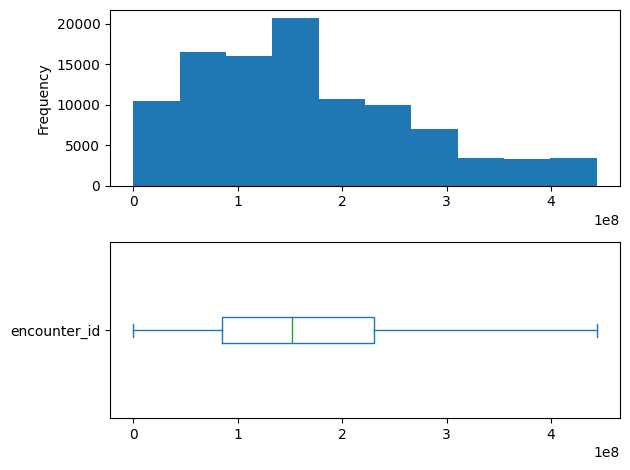

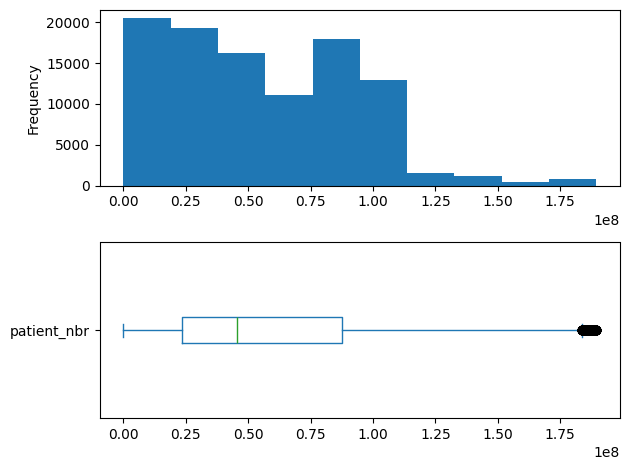

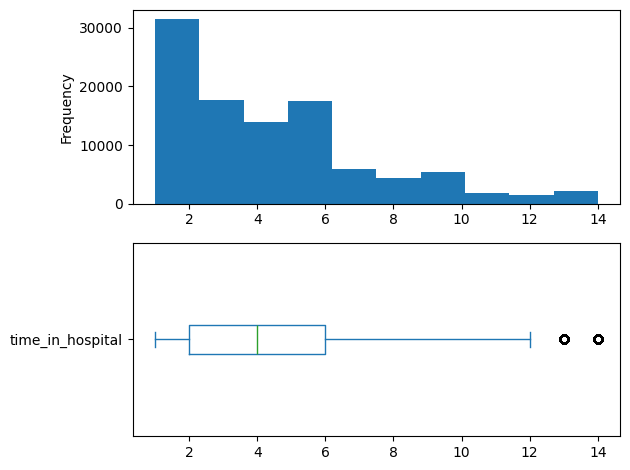

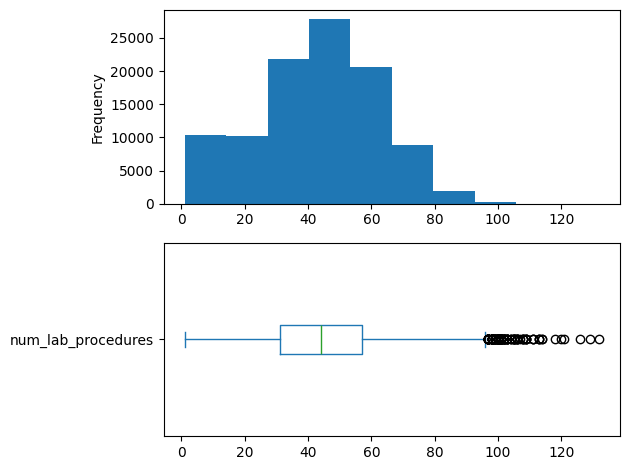

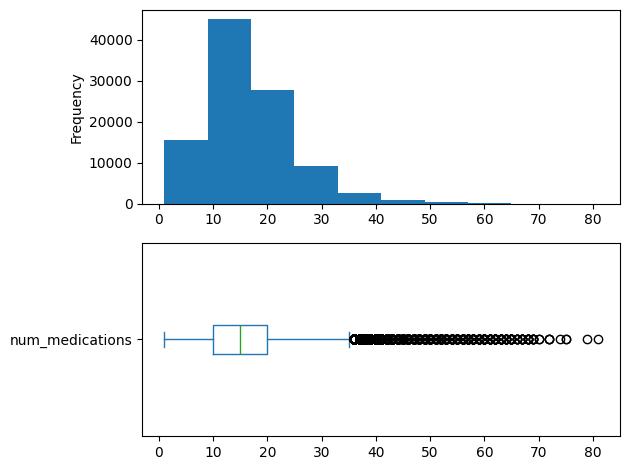

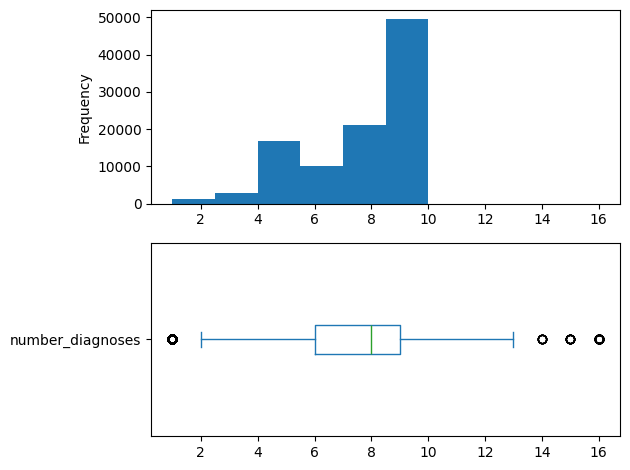

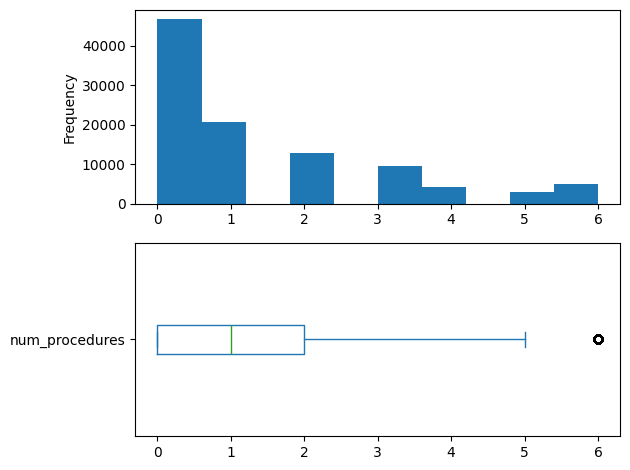

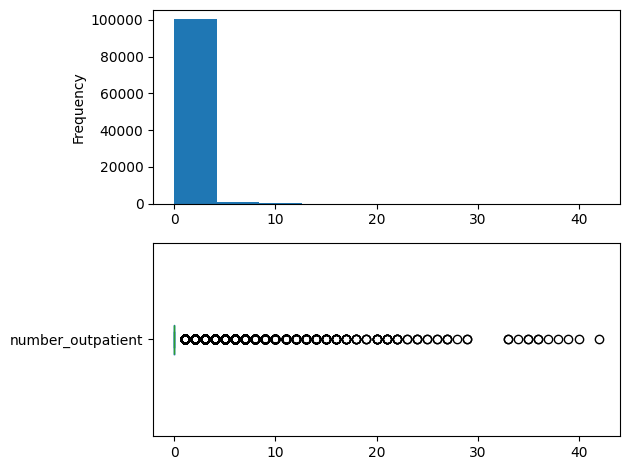

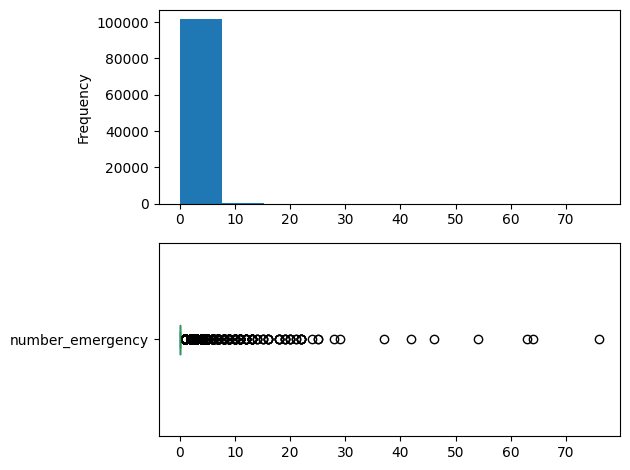

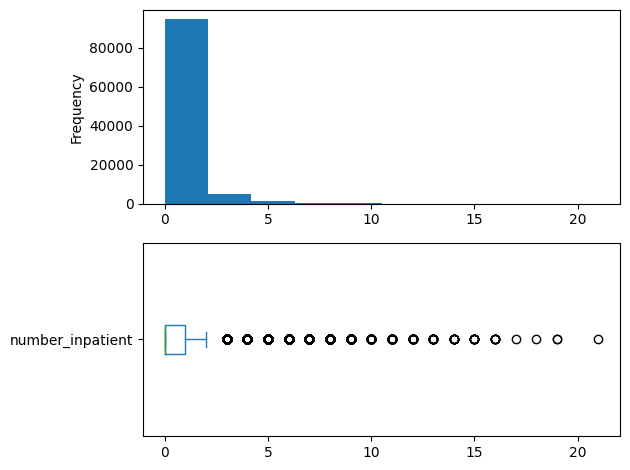

In [ ]:
for att in numerical_attributes:
    plt.subplot(2,1,1)
    diabetic_df[att].plot.hist()
    plt.subplot(2,1,2)
    diabetic_df[att].plot.box(vert=False)
    plt.tight_layout()
    plt.show()

In [ ]:
import seaborn as sns

<Axes: >

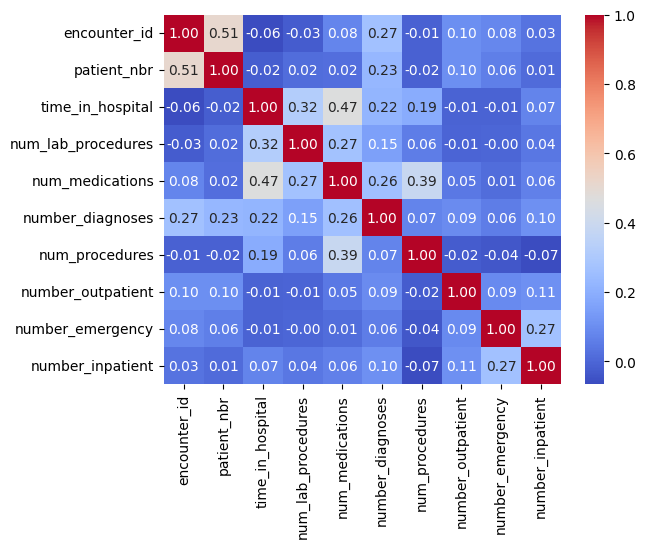

In [ ]:
corr_matrix = diabetic_df[numerical_attributes].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')

In [ ]:
correlated_pairs = (
    corr_matrix.stack()
    .reset_index()
    .rename(columns={'level_0': 'Attribute_1', 'level_1': 'Attribute_2', 0: 'Correlation'})
)

# Filter out self-correlations and keep pairs with correlation greater than 0.2
correlated_pairs = correlated_pairs[
    (correlated_pairs['Attribute_1'] != correlated_pairs['Attribute_2']) &
    (correlated_pairs['Correlation'].abs() > 0.2)
]

# Drop duplicate pairs (keep one of each pair)
correlated_pairs = correlated_pairs[
    ~correlated_pairs[['Attribute_1', 'Attribute_2']].apply(frozenset, axis=1).duplicated()
].reset_index(drop=True)

# Display the correlated pairs
correlated_pairs

Attribute_1         Attribute_2  Correlation
0        encounter_id         patient_nbr     0.512028
1        encounter_id    number_diagnoses     0.265149
2         patient_nbr    number_diagnoses     0.226847
3    time_in_hospital  num_lab_procedures     0.318450
4    time_in_hospital     num_medications     0.466135
5    time_in_hospital    number_diagnoses     0.220186
6  num_lab_procedures     num_medications     0.268161
7     num_medications    number_diagnoses     0.261526
8     num_medications      num_procedures     0.385767
9    number_emergency    number_inpatient     0.266559

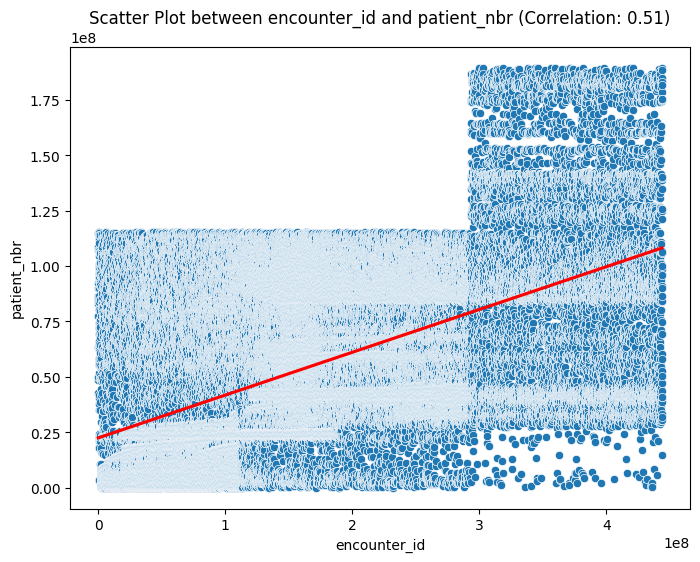

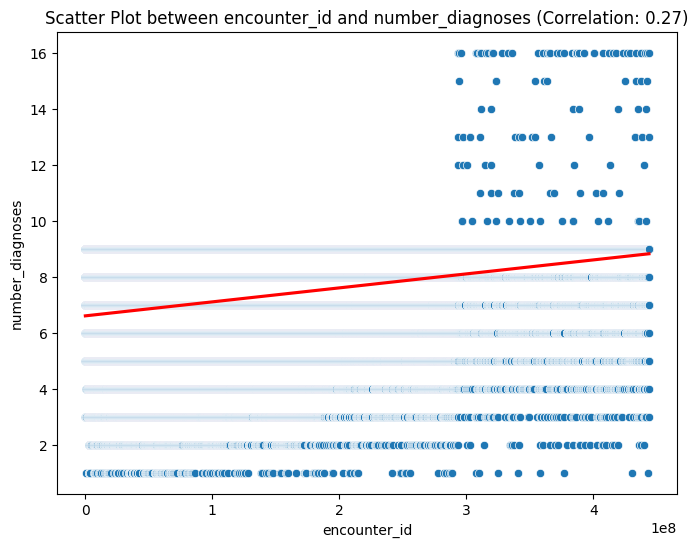

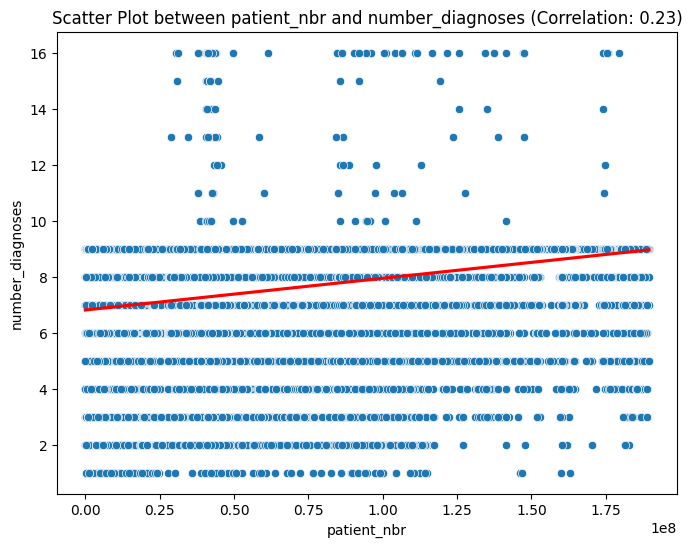

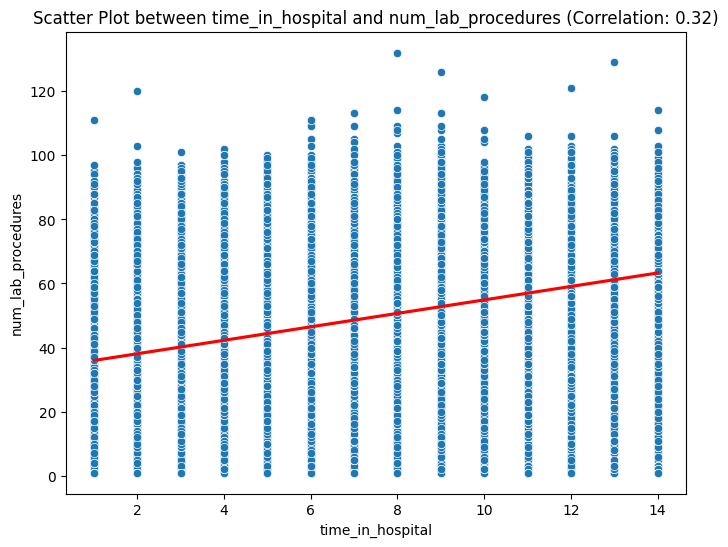

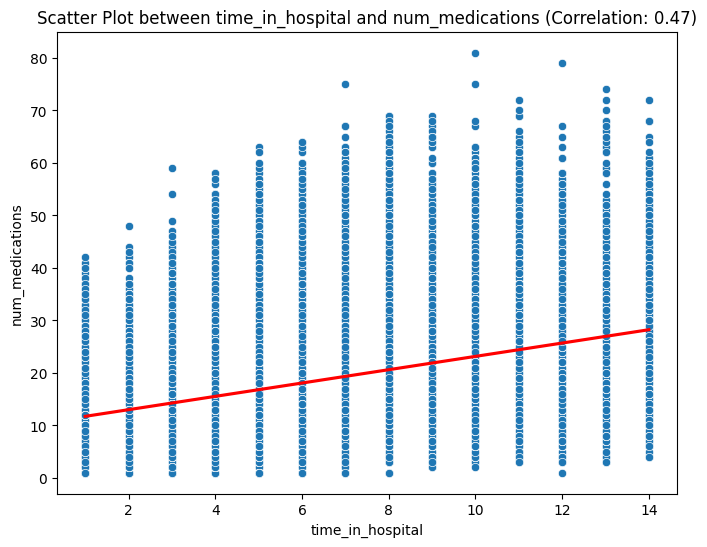

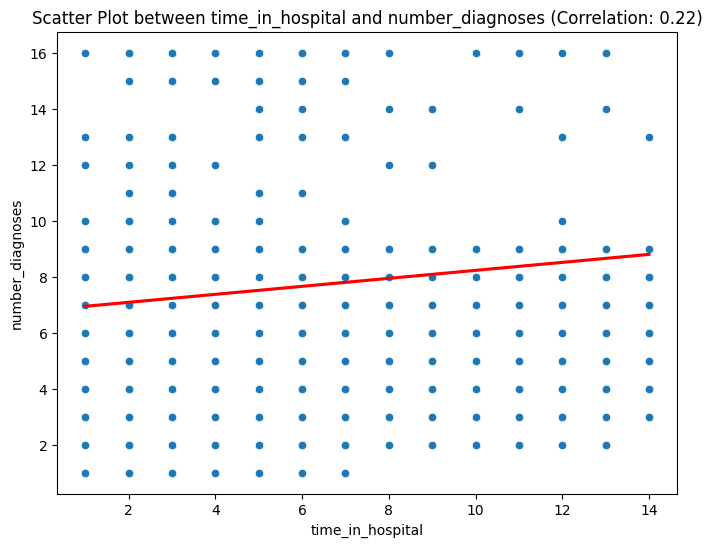

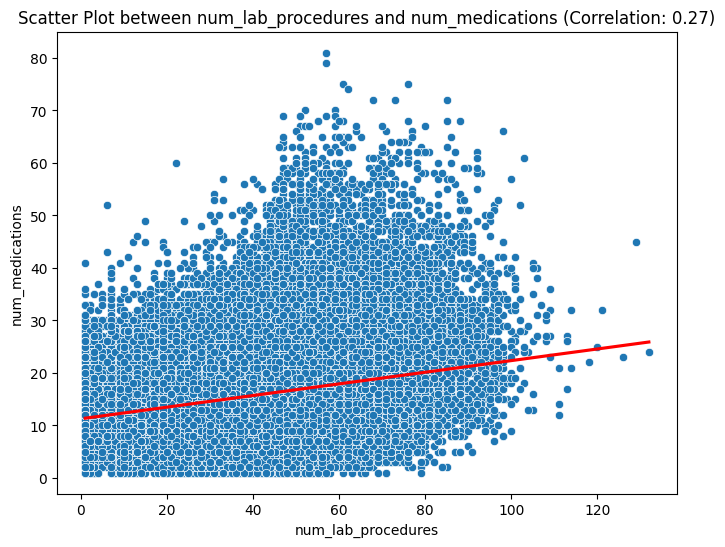

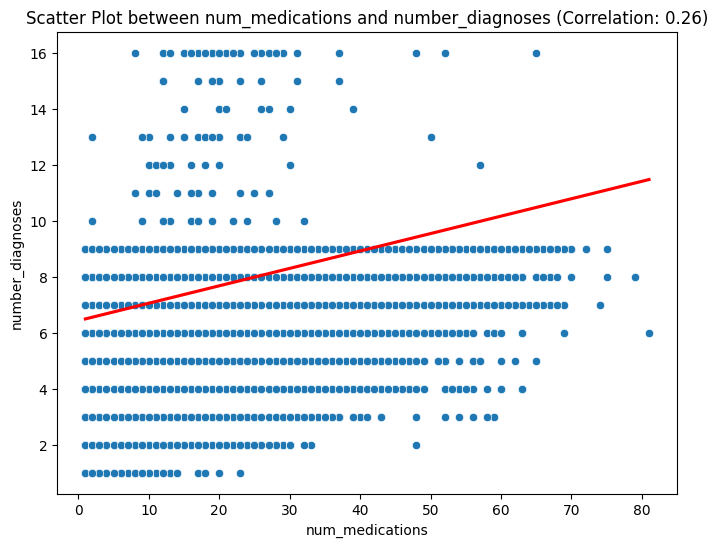

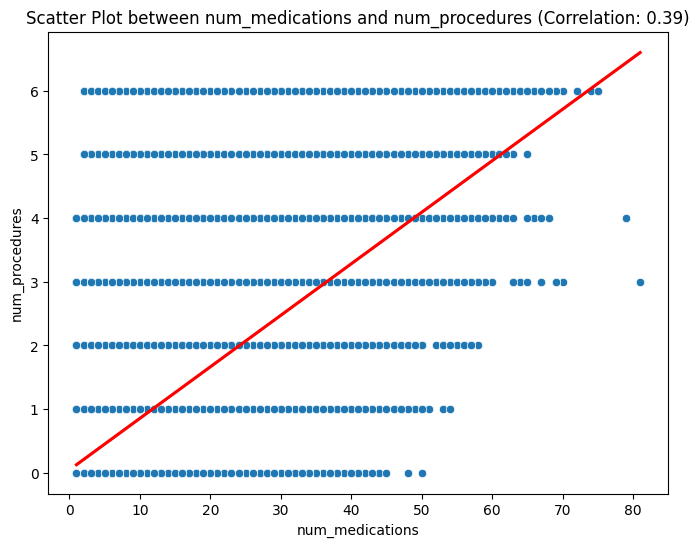

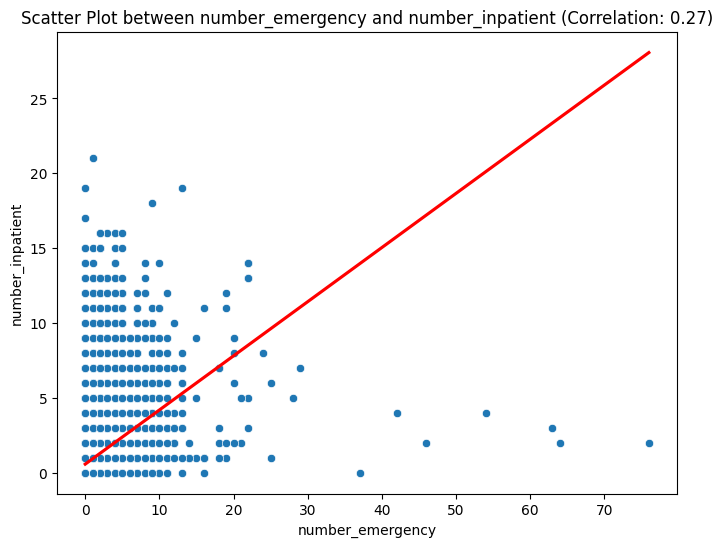

In [ ]:
for _, row in correlated_pairs.iterrows():
    attr1, attr2 = row['Attribute_1'], row['Attribute_2']
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=diabetic_df[attr1], y=diabetic_df[attr2])
    plt.title(f"Scatter Plot between {attr1} and {attr2} (Correlation: {row['Correlation']:.2f})")
    plt.xlabel(attr1)
    plt.ylabel(attr2)
    sns.regplot(x=diabetic_df[attr1], y=diabetic_df[attr2], scatter=False, color='red', ci=None)
    plt.show()

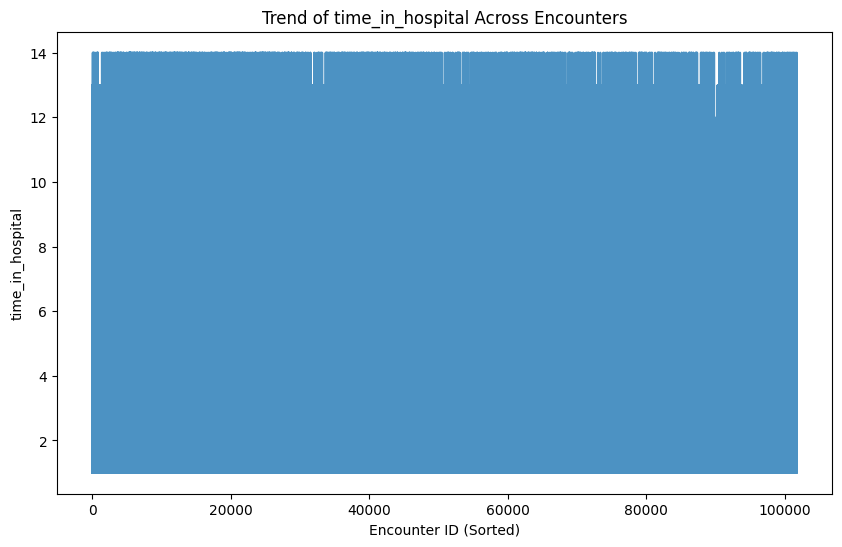

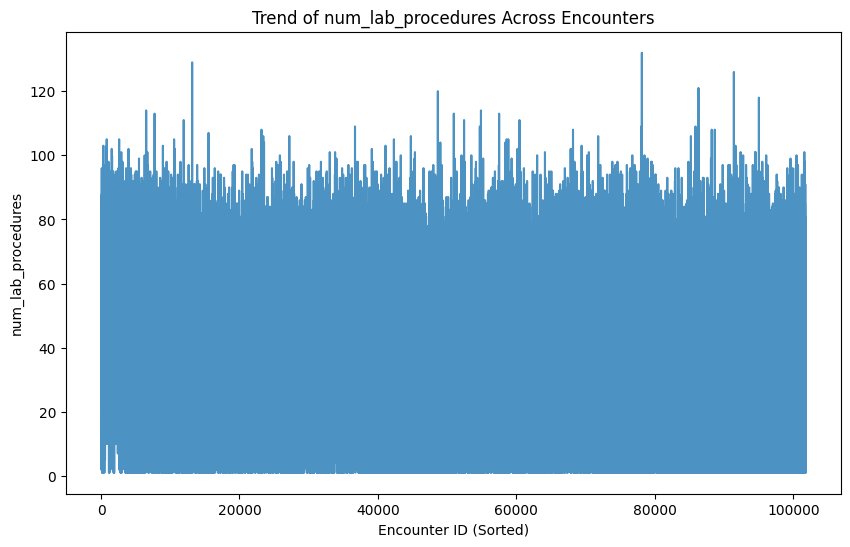

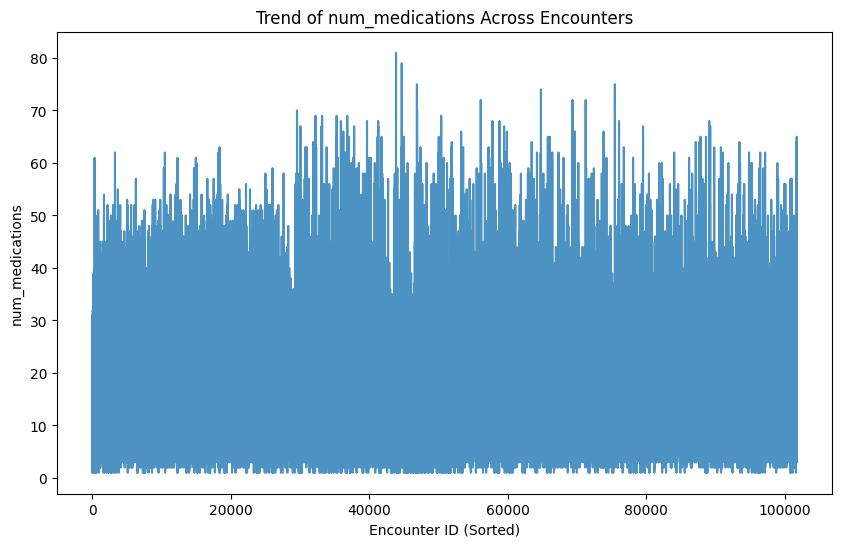

In [ ]:
numerical_cols_to_plot = ['time_in_hospital', 'num_lab_procedures', 'num_medications']

# Plot each numerical column in the list separately
for col in numerical_cols_to_plot:
    diabetic_df.sort_values(by='encounter_id')[col].plot(
        kind='line', alpha=0.8, figsize=(10, 6), title=f"Trend of {col} Across Encounters"
    )
    plt.xlabel('Encounter ID (Sorted)')
    plt.ylabel(col)
    plt.show()



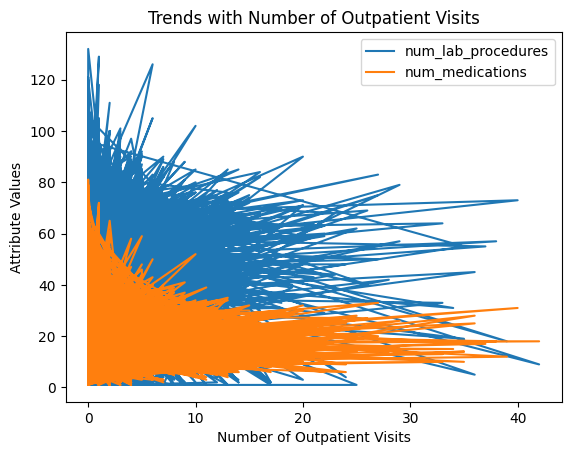

In [ ]:
cols_to_compare = ['num_lab_procedures', 'num_medications']

for col in cols_to_compare:
    plt.plot(diabetic_df['number_outpatient'], diabetic_df[col], label=col)

plt.xlabel('Number of Outpatient Visits')
plt.ylabel('Attribute Values')
plt.title('Trends with Number of Outpatient Visits')
plt.legend()
plt.show()


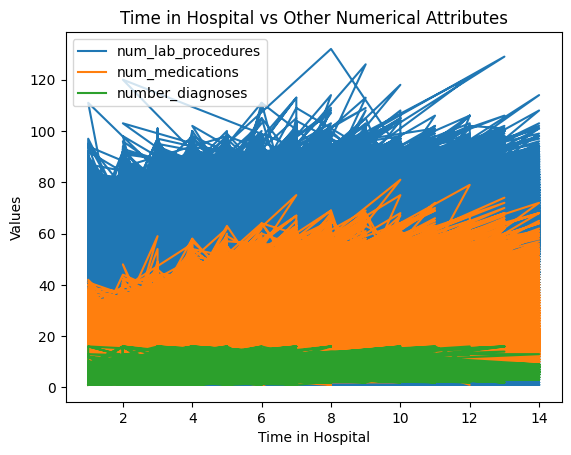

In [ ]:
numerical_cols_to_compare = ['num_lab_procedures', 'num_medications', 'number_diagnoses']

for col in numerical_cols_to_compare:
    plt.plot(diabetic_df['time_in_hospital'], diabetic_df[col], label=col)

plt.xlabel('Time in Hospital')
plt.ylabel('Values')
plt.title('Time in Hospital vs Other Numerical Attributes')
plt.legend()
plt.show()


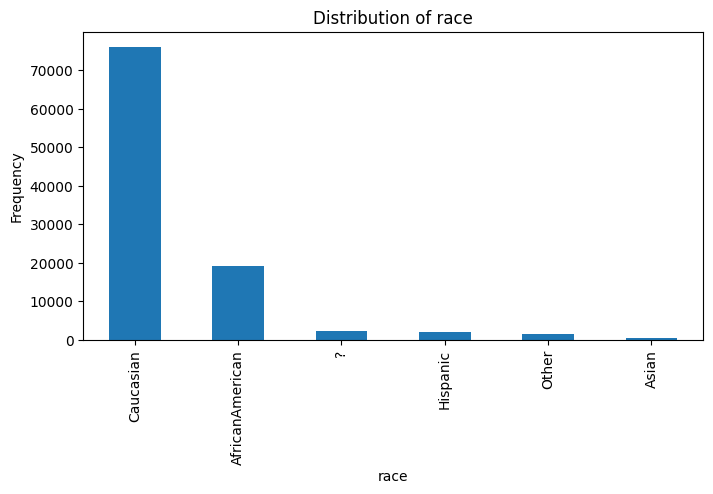

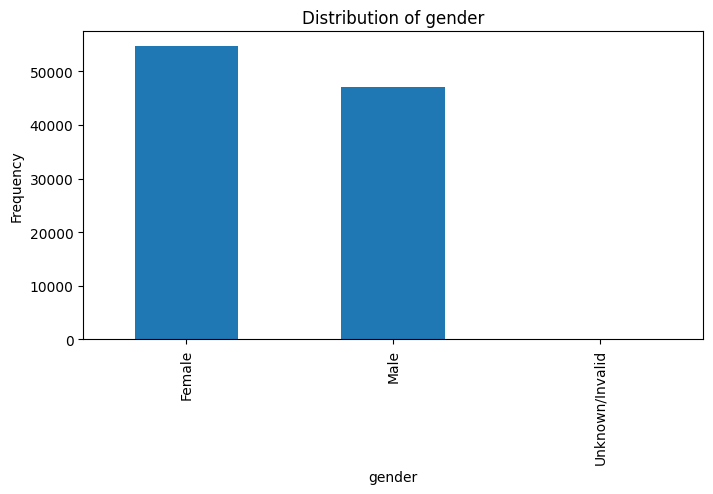

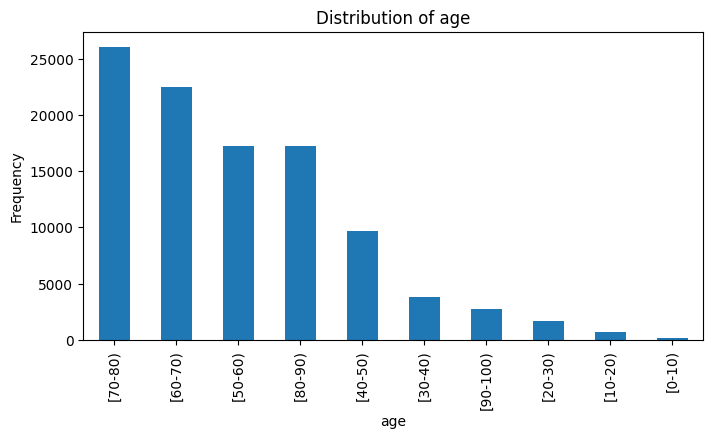

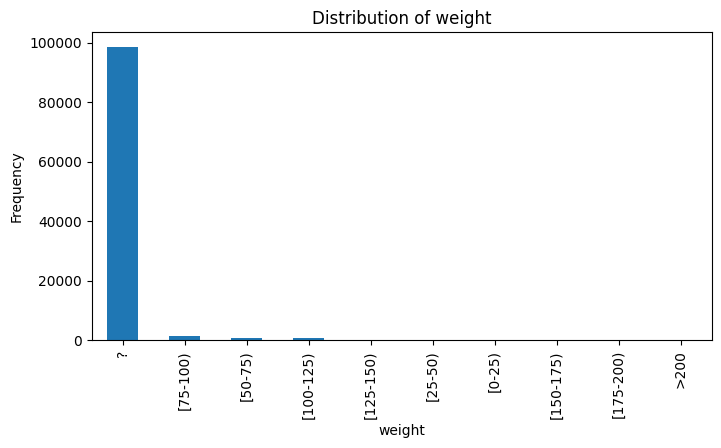

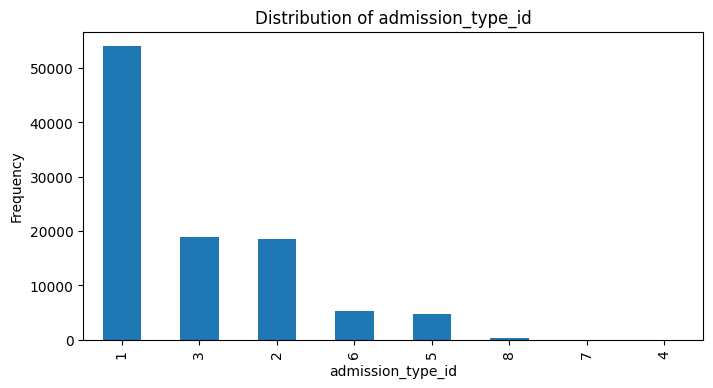

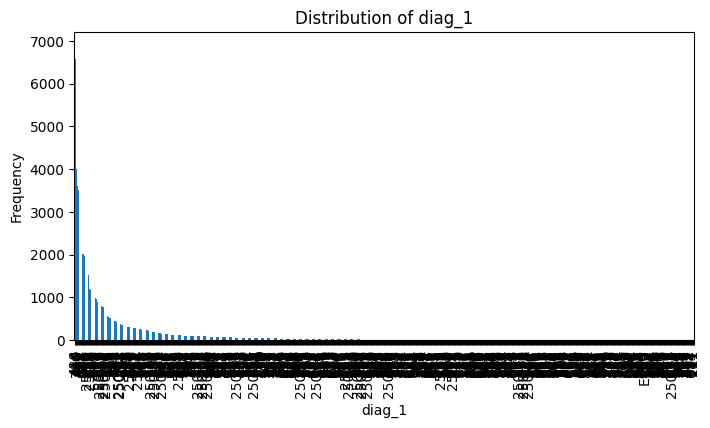

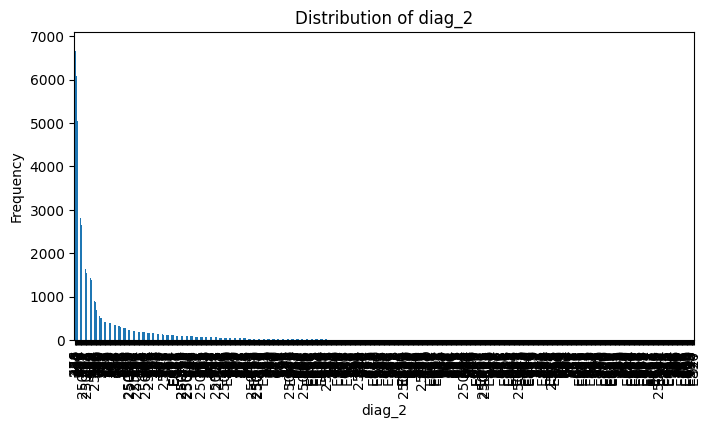

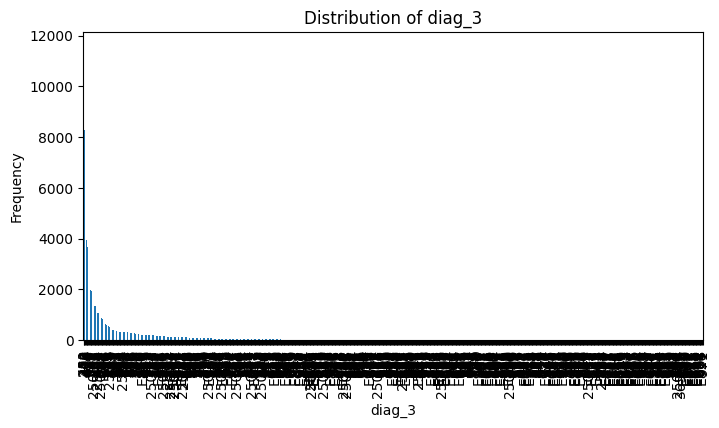

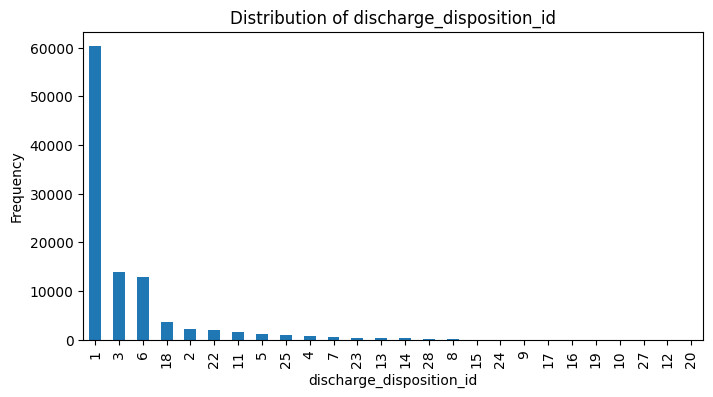

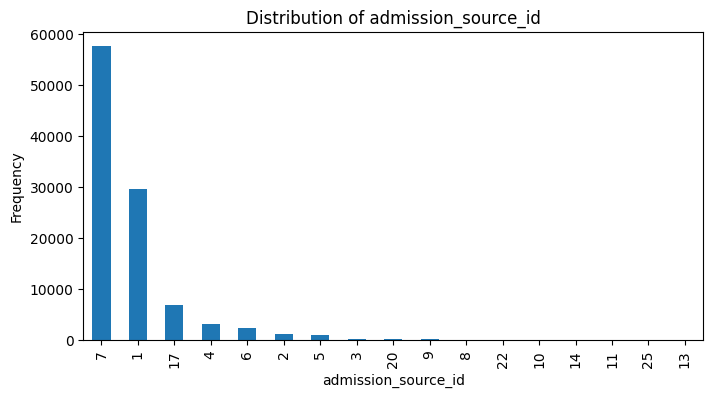

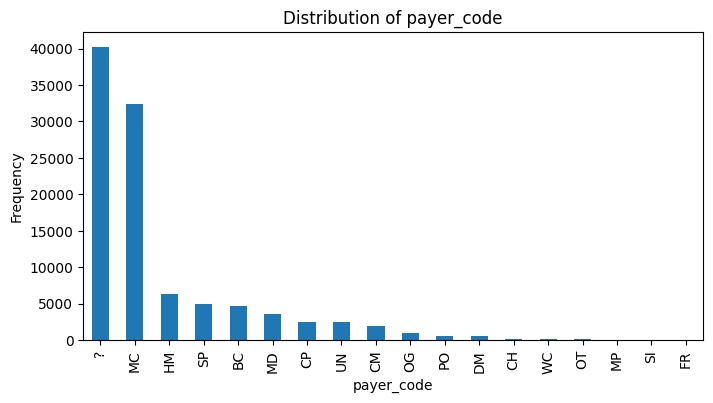

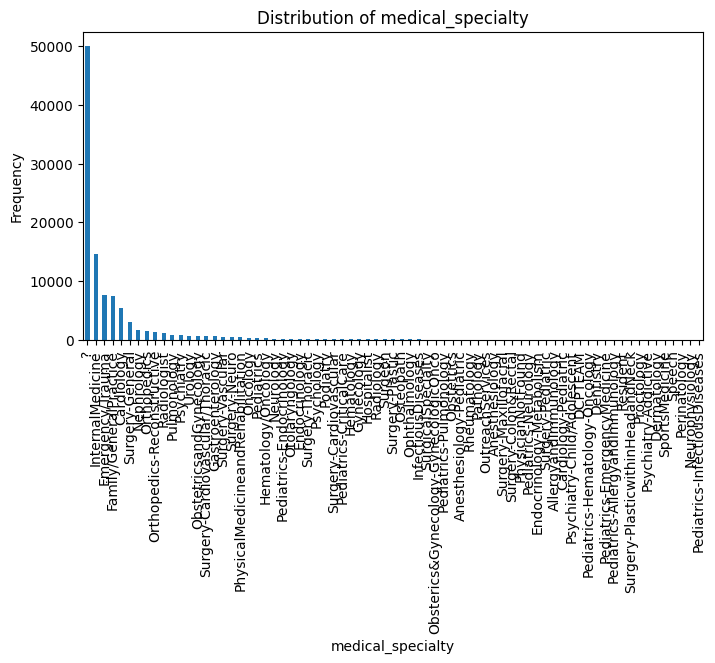

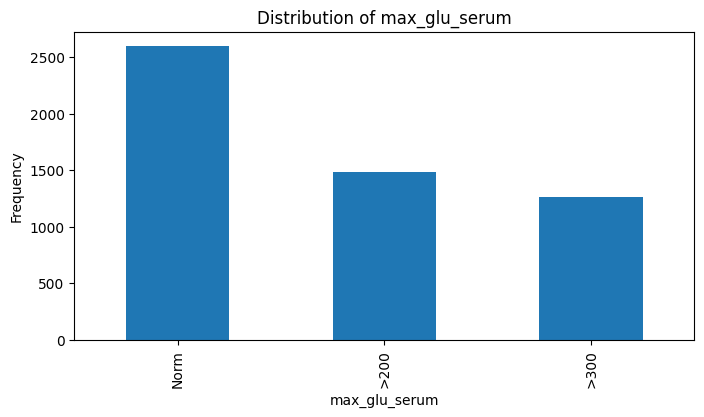

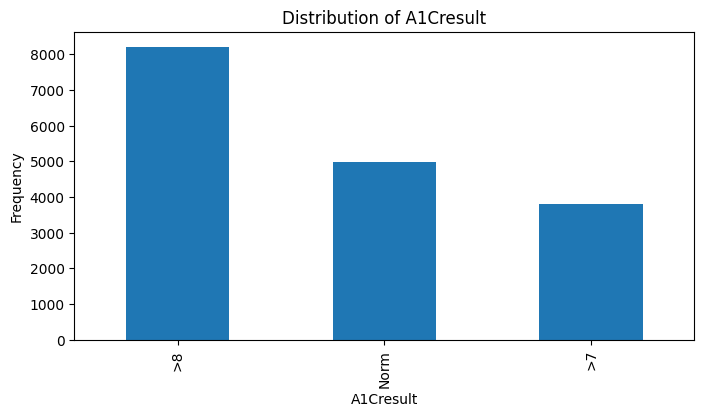

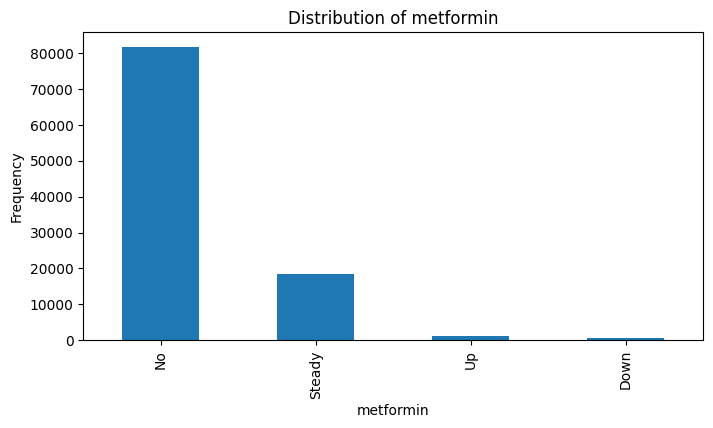

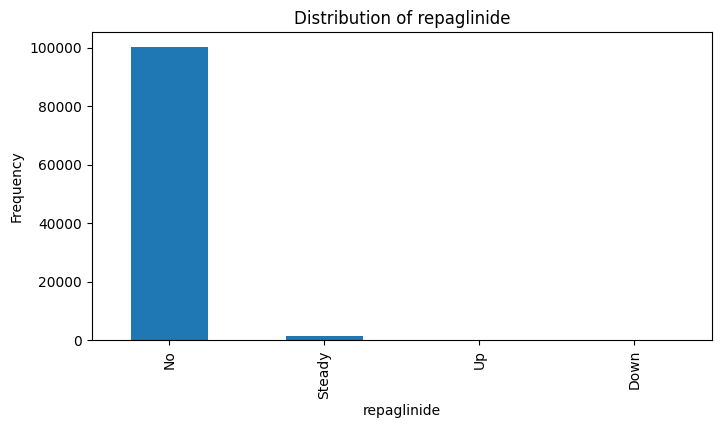

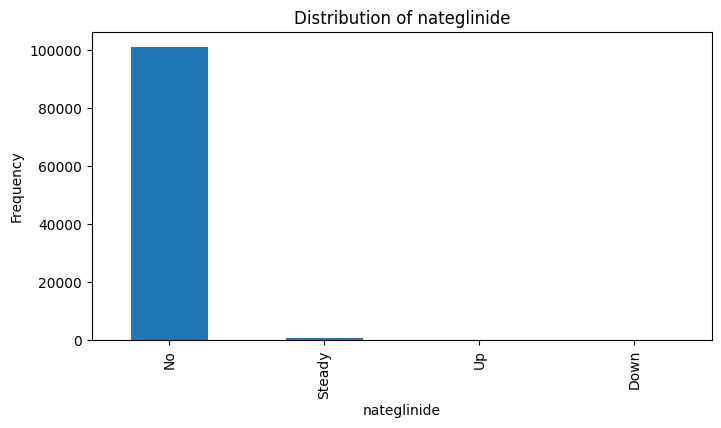

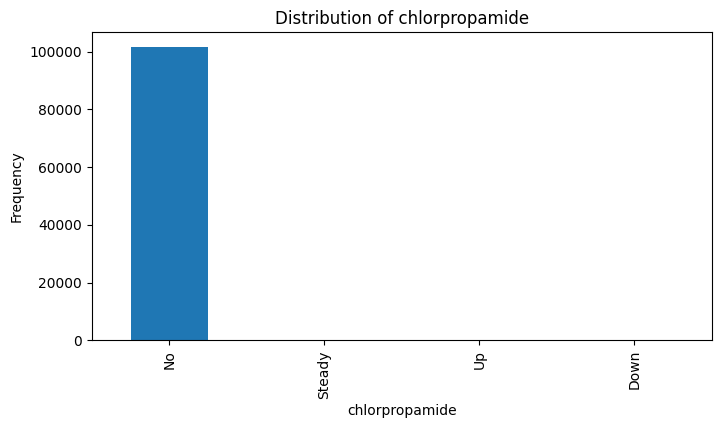

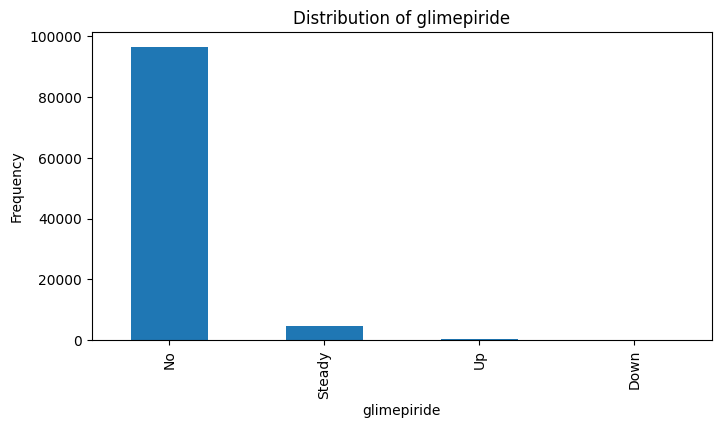

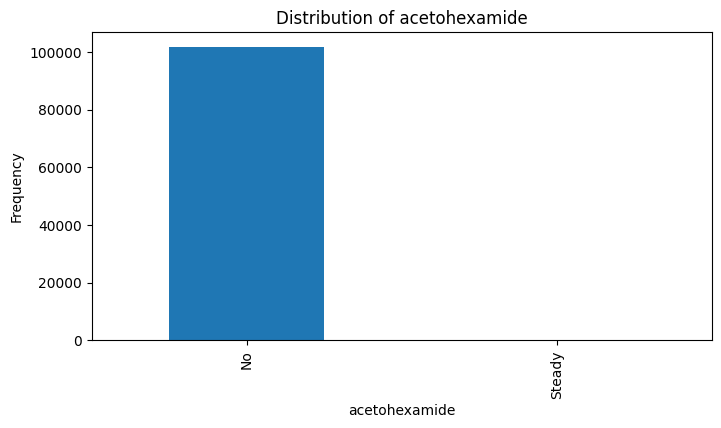

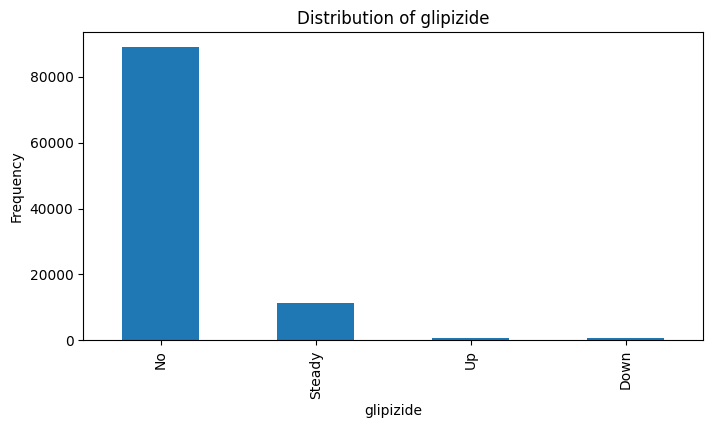

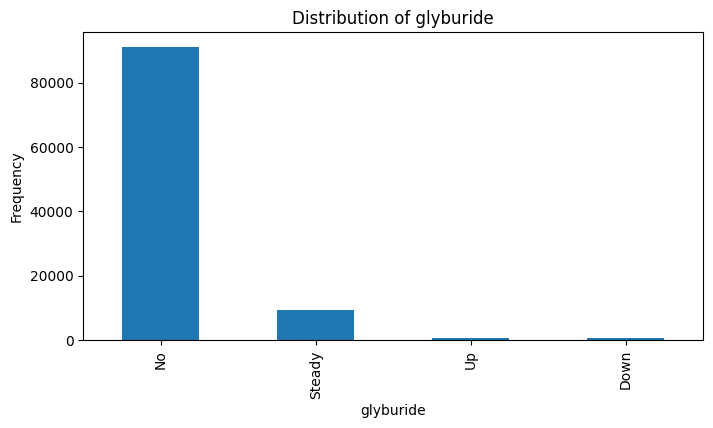

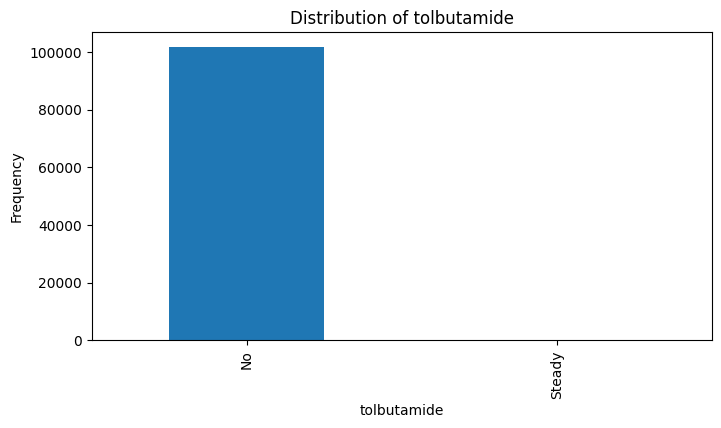

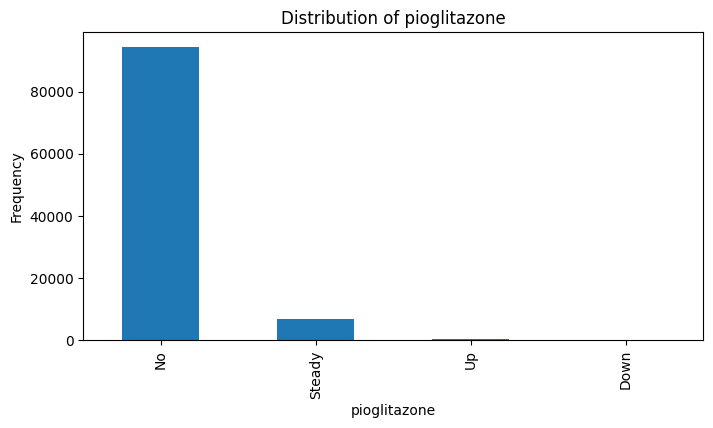

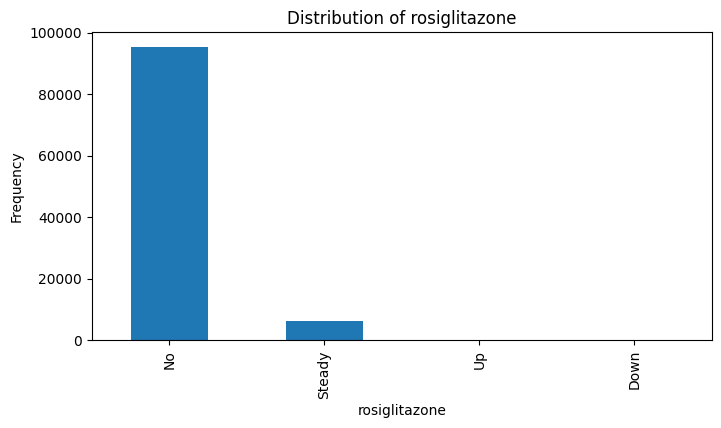

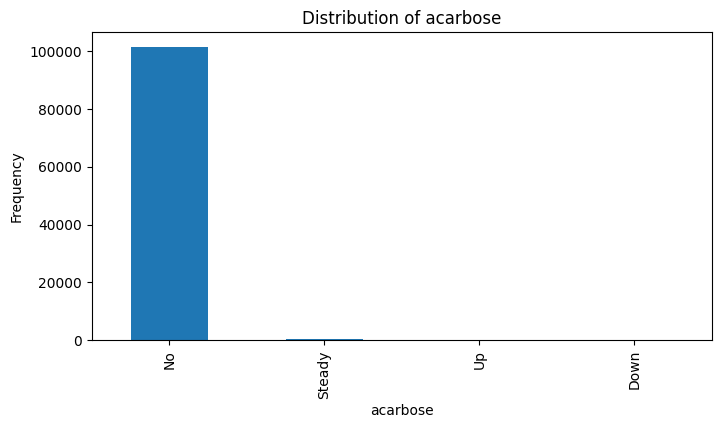

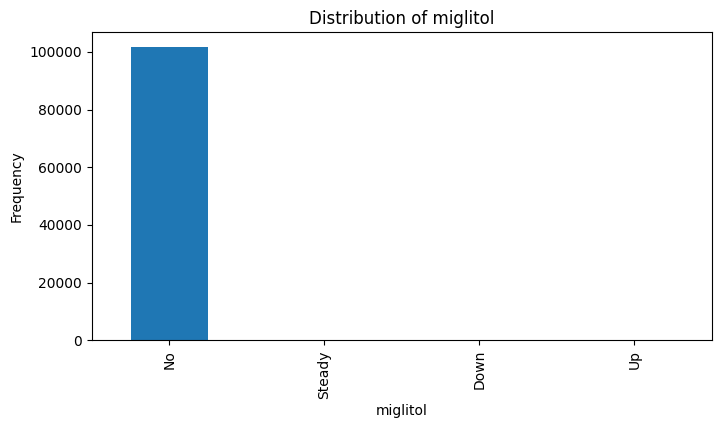

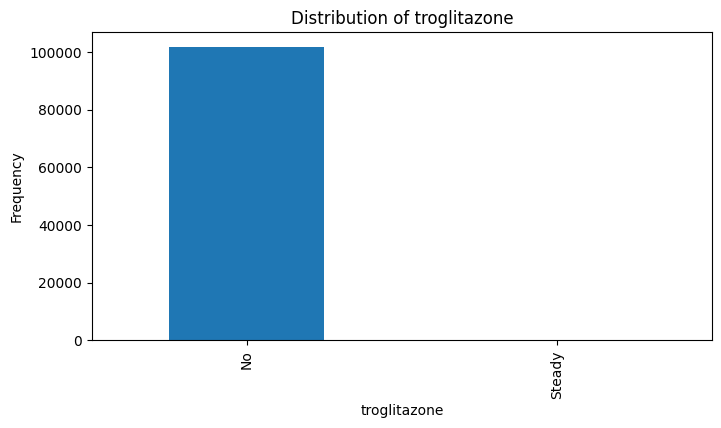

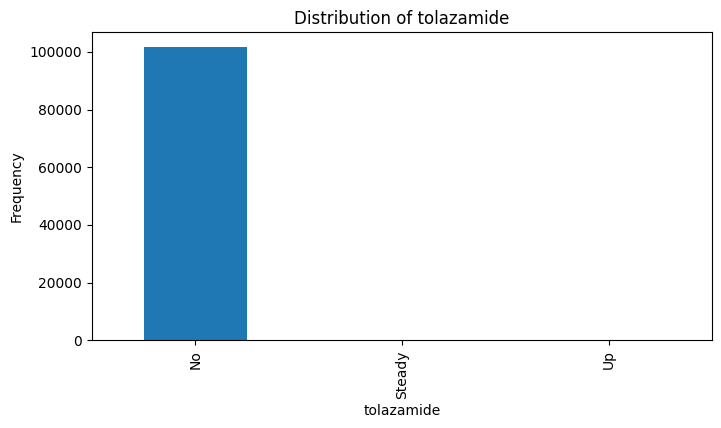

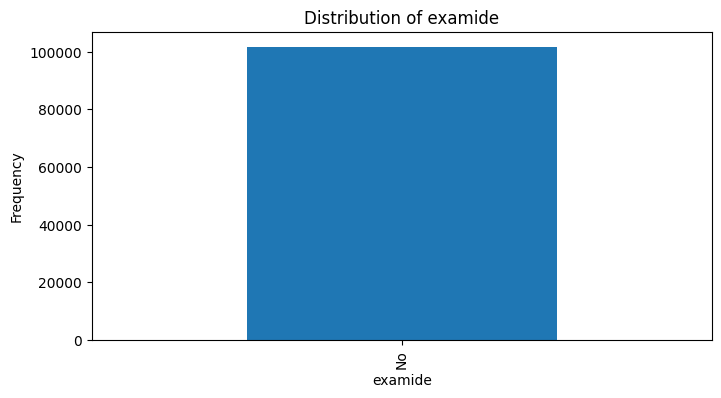

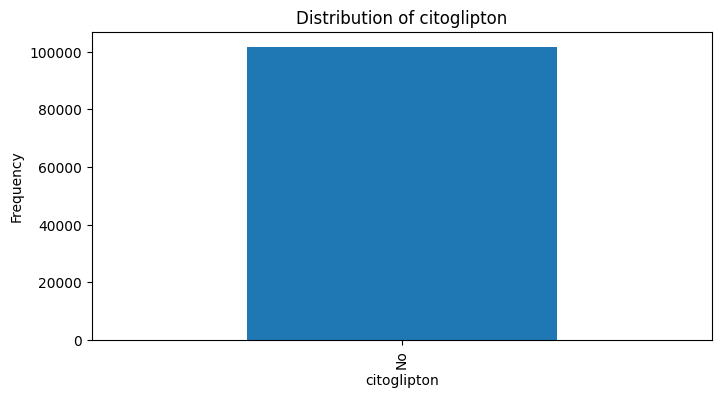

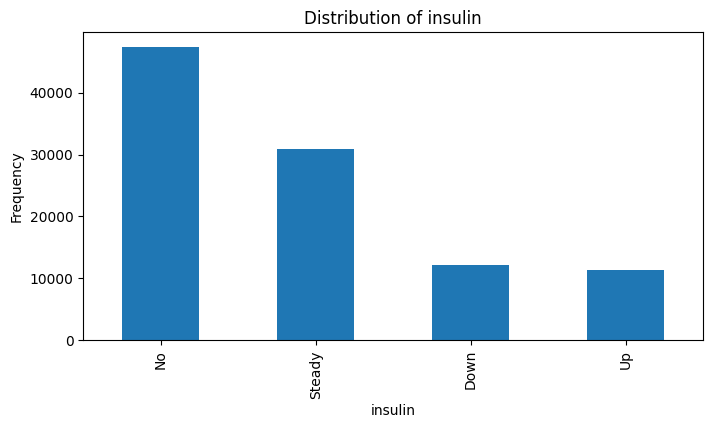

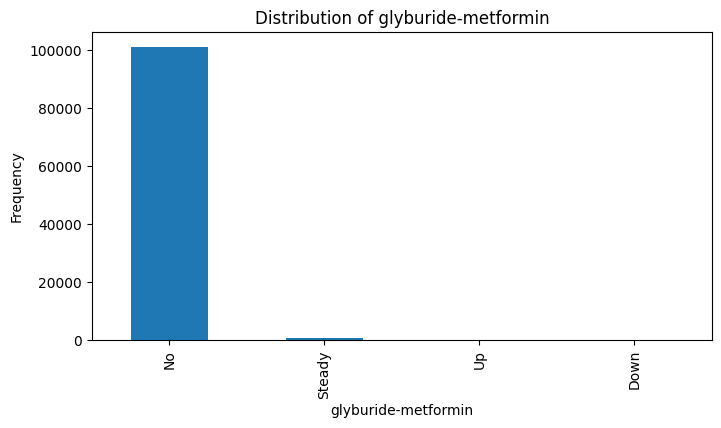

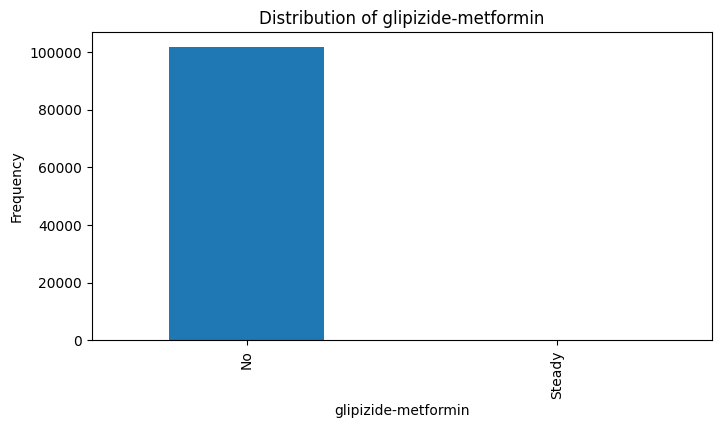

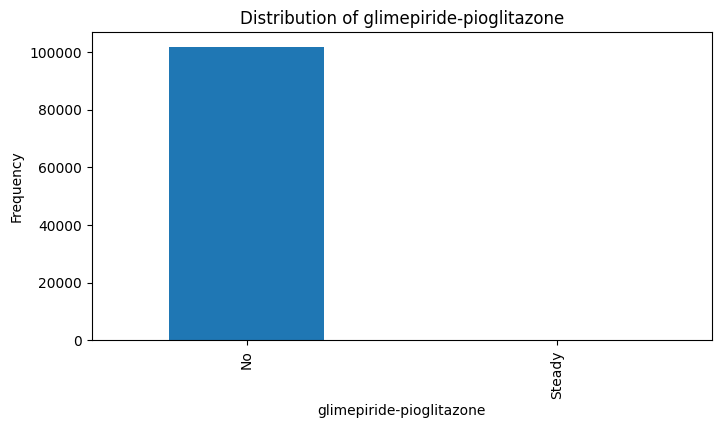

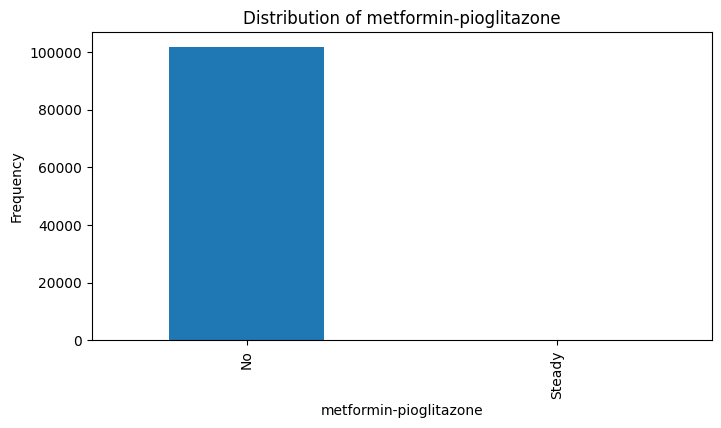

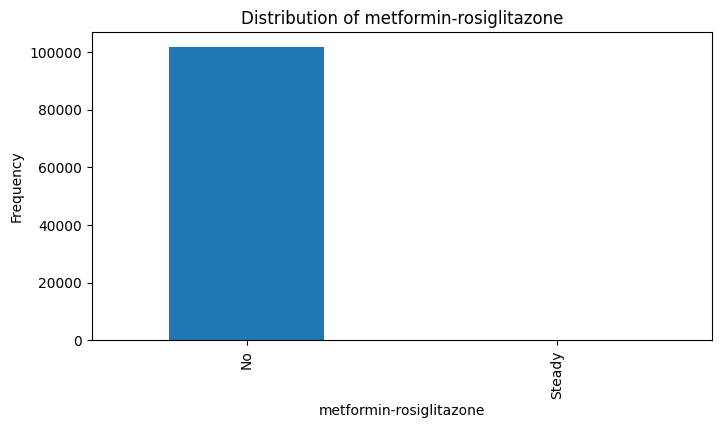

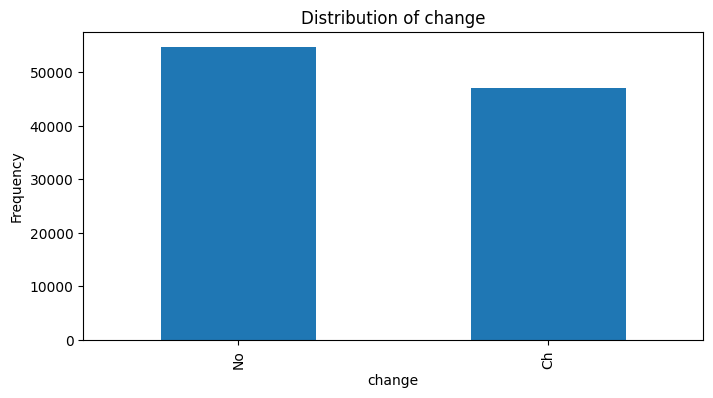

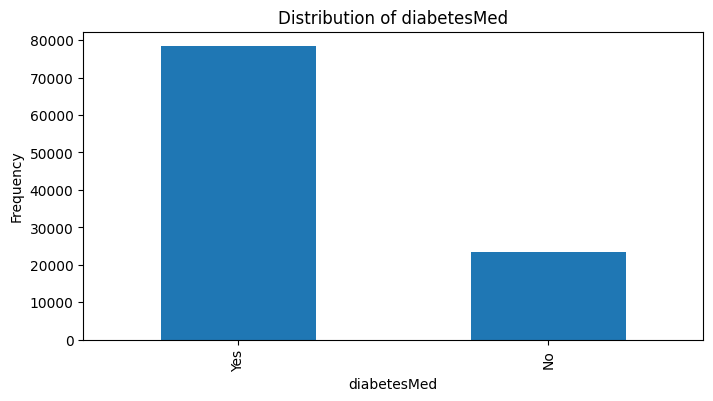

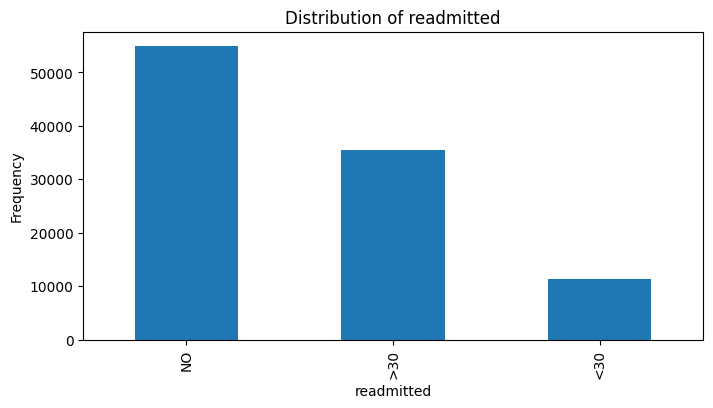

In [ ]:
for col in categorical_attributes:
    diabetic_df[col].value_counts().plot(
        kind='bar', figsize=(8, 4), title=f"Distribution of {col}"
    )
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
def plot_horizontal_bar(attribute, top_n=10):
    category_counts = diabetic_df[attribute].value_counts()
    top_categories = category_counts[:top_n]

    # Plot
    top_categories.plot(
        kind='barh', figsize=(14, 8), title=f"Top {top_n} Categories in {attribute}"
    )
    plt.xlabel('Frequency')
    plt.ylabel(attribute)
    plt.show()

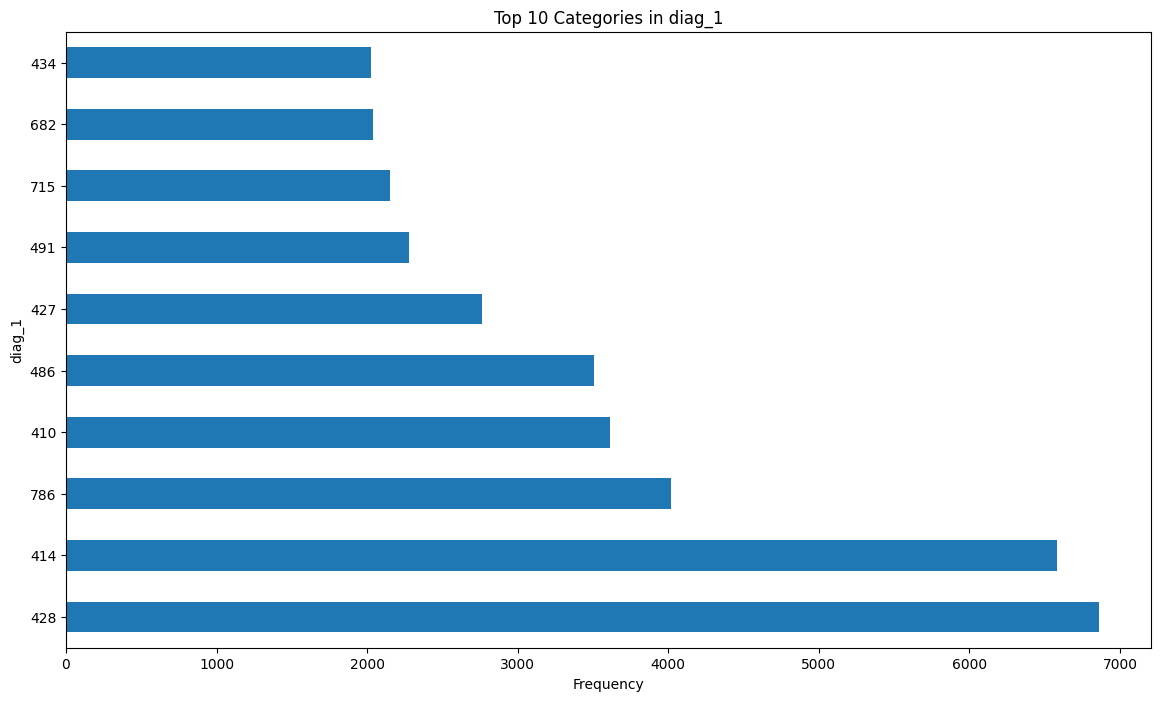

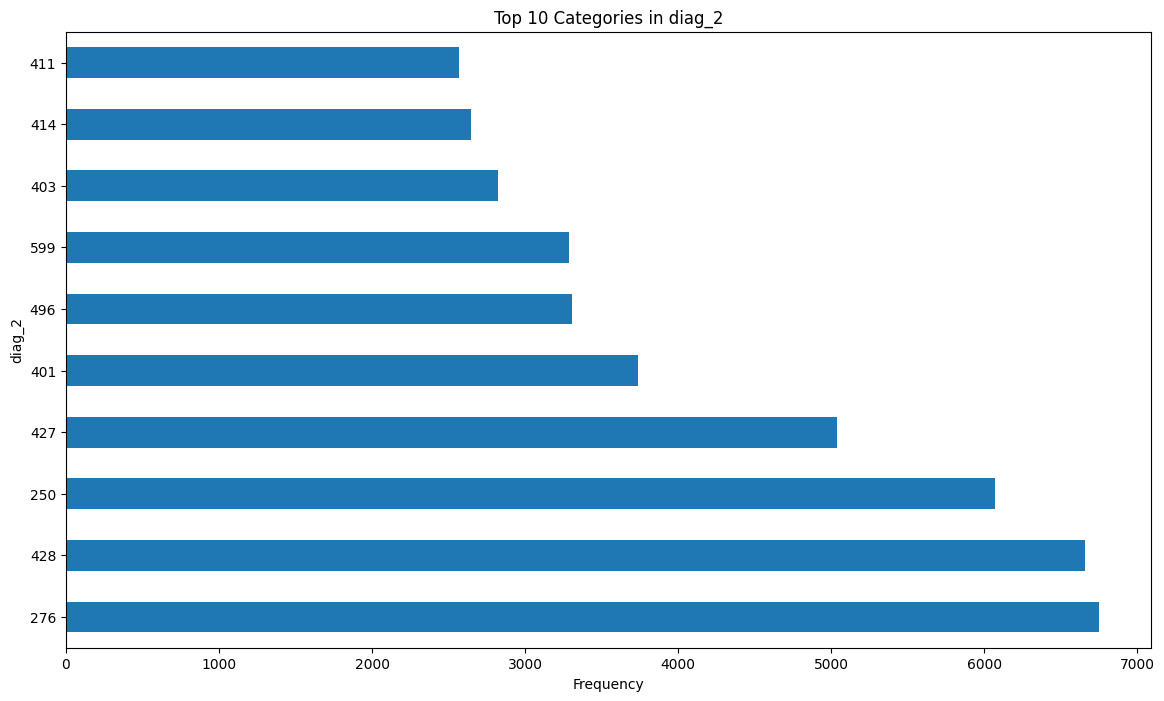

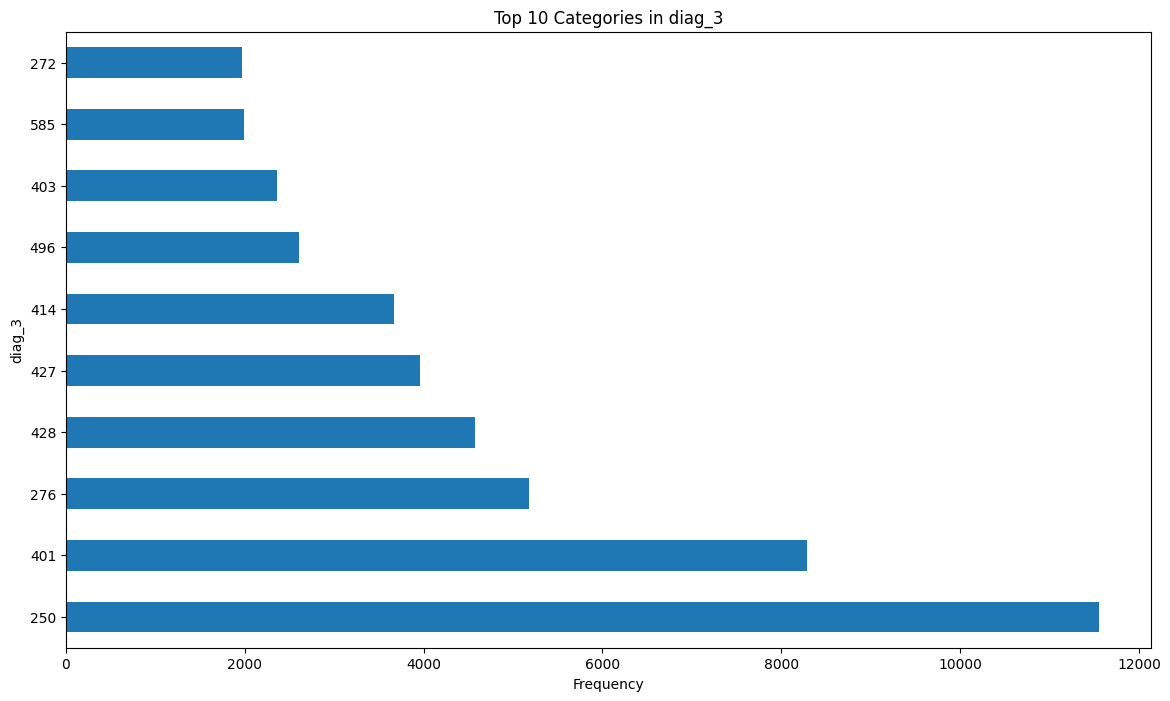

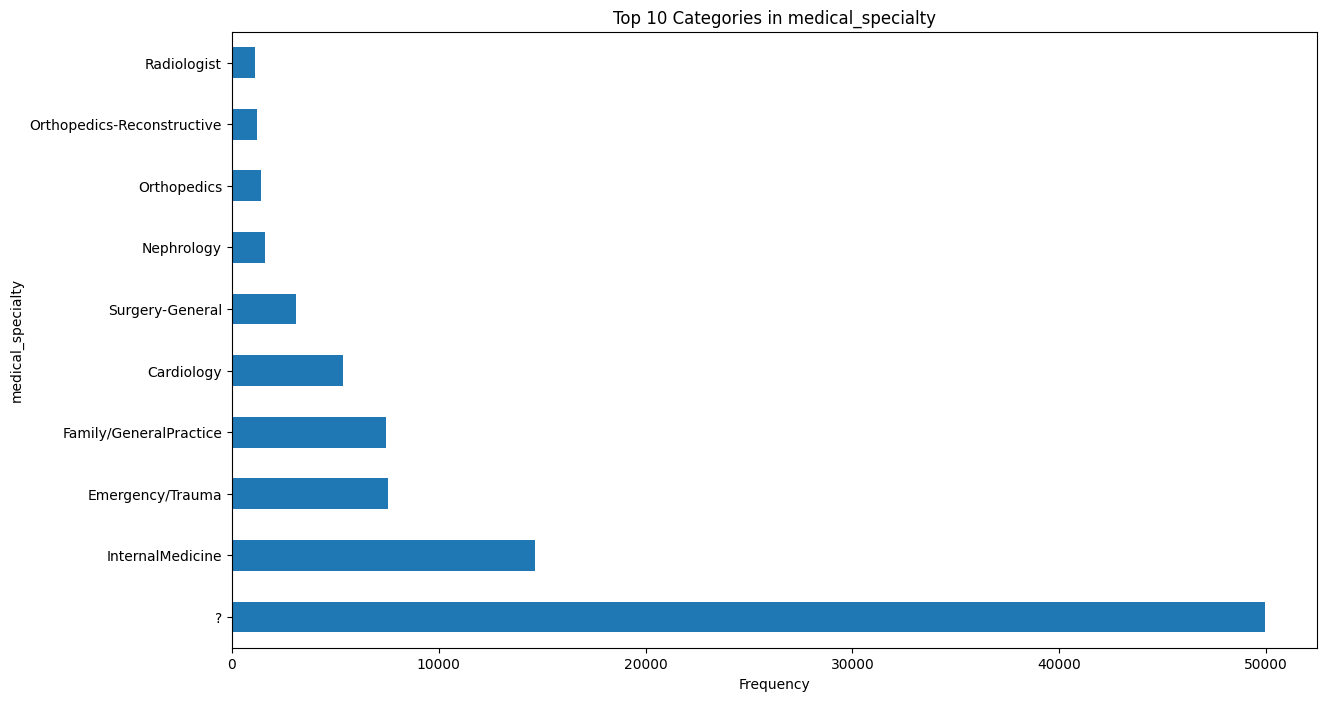

In [ ]:
large_attributes = ['diag_1', 'diag_2', 'diag_3', 'medical_specialty']
for attr in large_attributes:
    plot_horizontal_bar(attr)

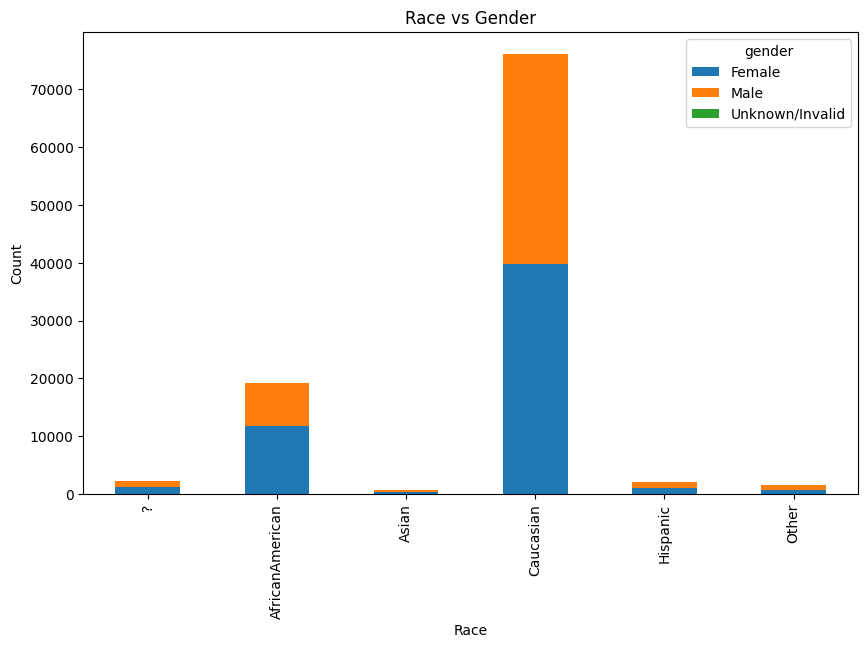

In [ ]:
pd.crosstab(diabetic_df['race'], diabetic_df['gender']).plot(
    kind='bar', stacked=True, figsize=(10, 6), title="Race vs Gender"
)
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

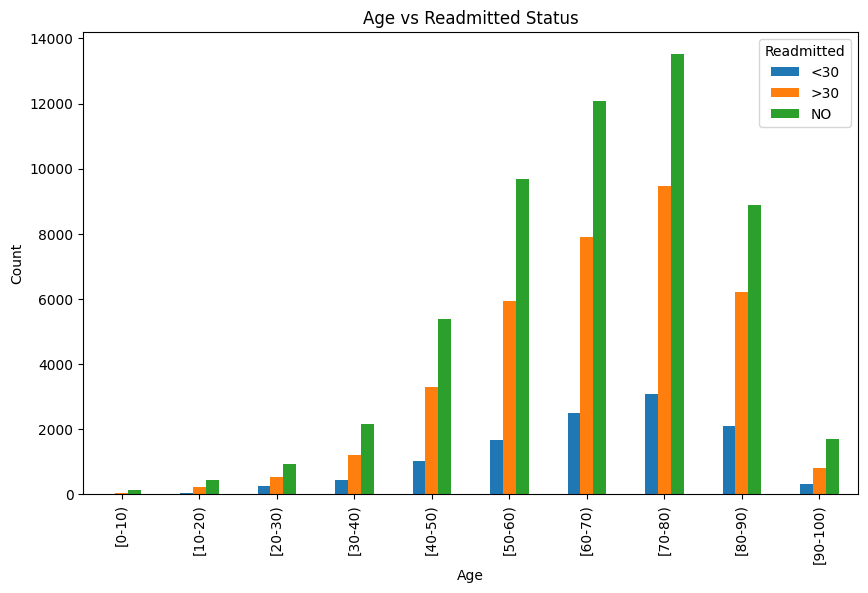

In [ ]:
pd.crosstab(diabetic_df['age'], diabetic_df['readmitted']).plot(
    kind='bar', figsize=(10, 6), title="Age vs Readmitted Status"
)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Readmitted')
plt.show()

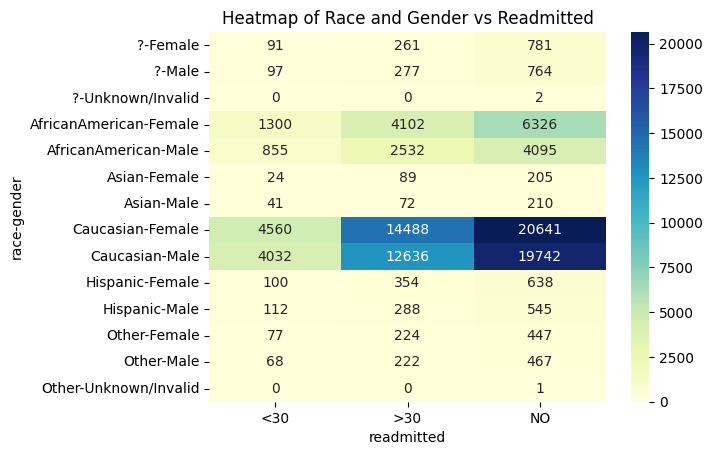

In [ ]:
heatmap_data = pd.crosstab(
    [diabetic_df['race'], diabetic_df['gender']],
    diabetic_df['readmitted']
)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Race and Gender vs Readmitted")
plt.show()

In [ ]:
def grouped_bar_chart(cat1, cat2):
    grouped_data = diabetic_df.groupby([cat1, cat2]).size().unstack(fill_value=0)
    grouped_data.plot(
        kind='bar', figsize=(12, 6), title=f"{cat1} vs {cat2}"
    )
    plt.xlabel(cat1)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

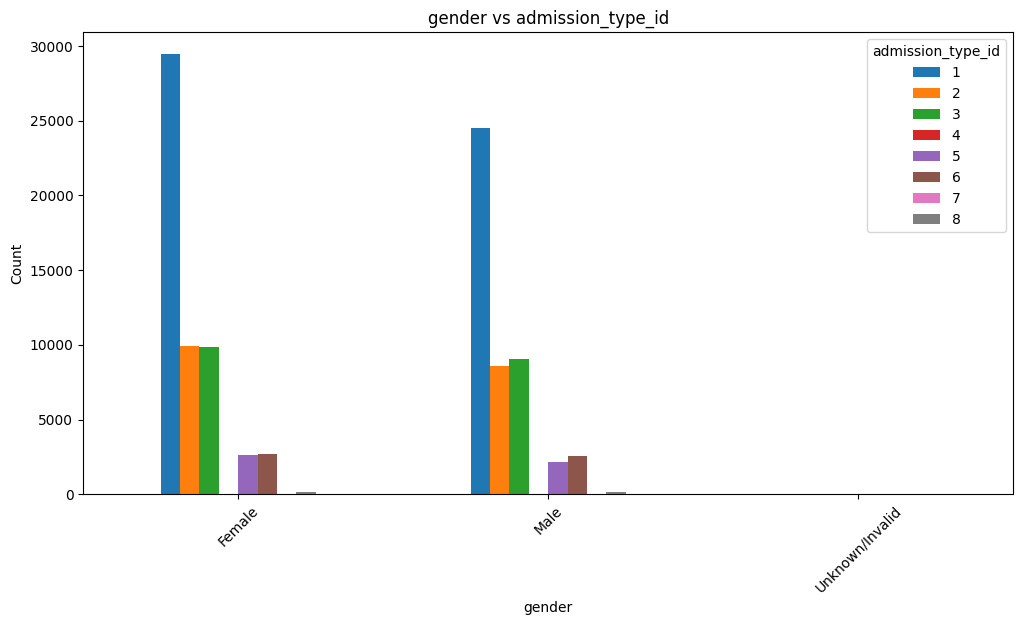

In [ ]:
grouped_bar_chart('gender', 'admission_type_id')

In [ ]:
def stacked_bar_chart(cat1, cat2):
    stacked_data = diabetic_df.groupby([cat1, cat2]).size().unstack(fill_value=0)
    stacked_data.plot(
        kind='bar', stacked=True, figsize=(12, 6), title=f"{cat1} vs {cat2} (Stacked)"
    )
    plt.xlabel(cat1)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

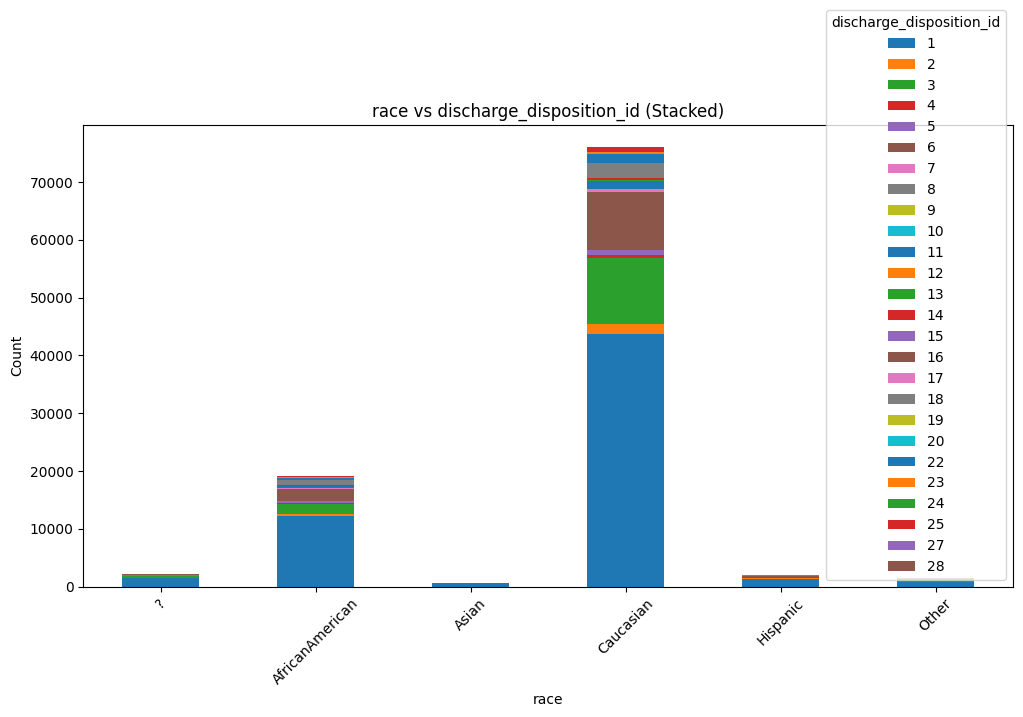

In [ ]:
stacked_bar_chart('race', 'discharge_disposition_id')

In [ ]:
def percent_stacked_bar(cat1, cat2):
    crosstab = pd.crosstab(diabetic_df[cat1], diabetic_df[cat2], normalize='index') * 100
    crosstab.plot(
        kind='bar', stacked=True, figsize=(12, 6), title=f"{cat1} vs {cat2} (Percent Stacked)"
    )
    plt.xlabel(cat1)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(title=cat2, bbox_to_anchor=(1.05, 1))
    plt.show()

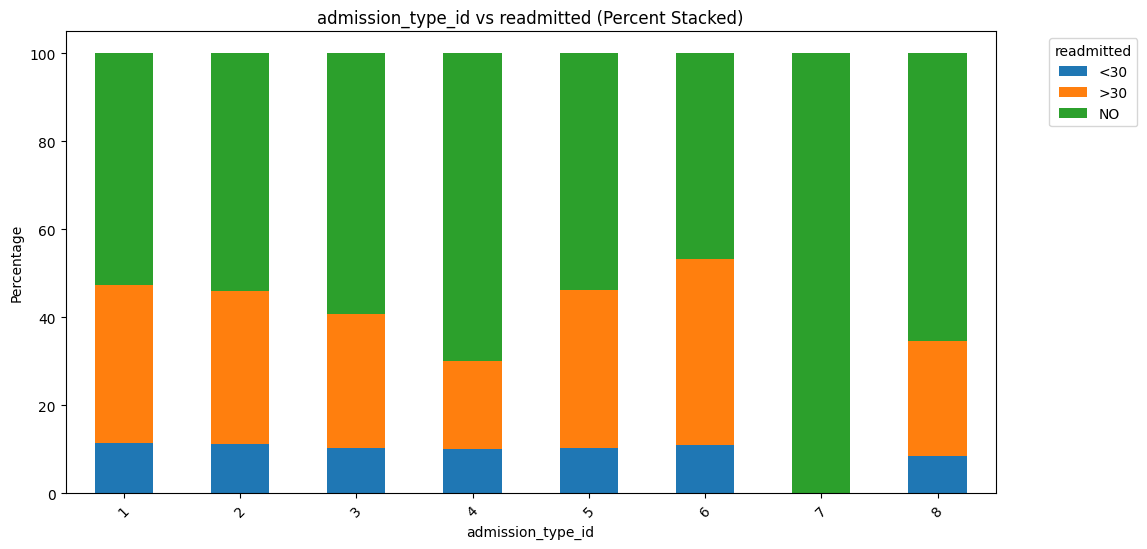

In [ ]:
percent_stacked_bar('admission_type_id', 'readmitted')

In [ ]:
def boxplot_numeric_vs_categorical(num_col, cat_col):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=cat_col, y=num_col, data=diabetic_df)
    plt.title(f"{num_col} vs {cat_col}")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
import numpy as np

In [ ]:
def barplot_mean_numeric_vs_categorical(num_col, cat_col):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cat_col, y=num_col, data=diabetic_df, estimator=np.mean, ci=None)
    plt.title(f"Average {num_col} by {cat_col}")
    plt.xticks(rotation=45)
    plt.ylabel(f"Average {num_col}")
    plt.show()

In [ ]:
boxplot_combinations = [
    ('time_in_hospital', 'age'),
    ('num_lab_procedures', 'medical_specialty'),
    ('num_medications', 'admission_type_id'),
    ('number_diagnoses', 'discharge_disposition_id'),
    ('number_outpatient', 'readmitted'),
    ('number_emergency', 'age'),
    ('number_inpatient', 'race')
]


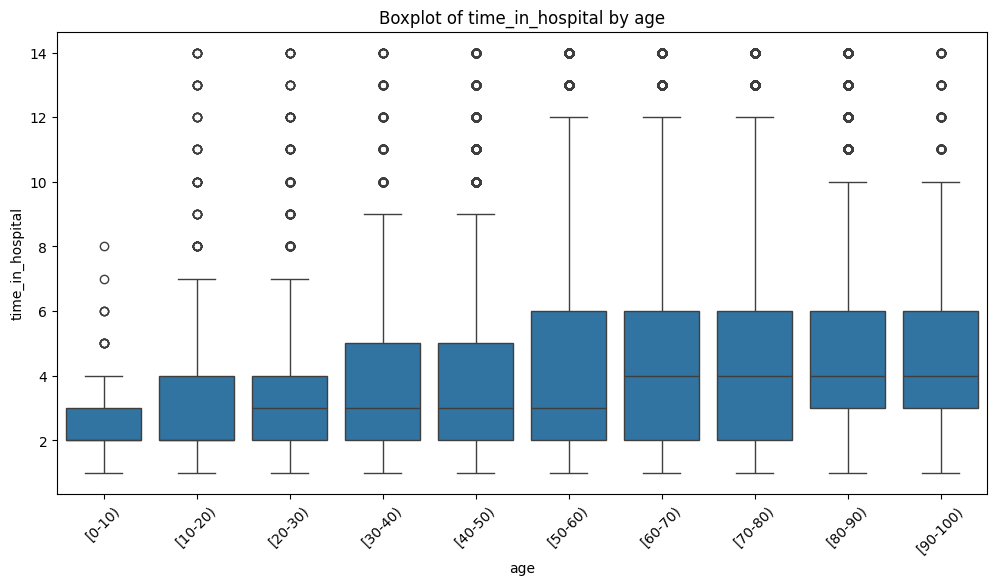

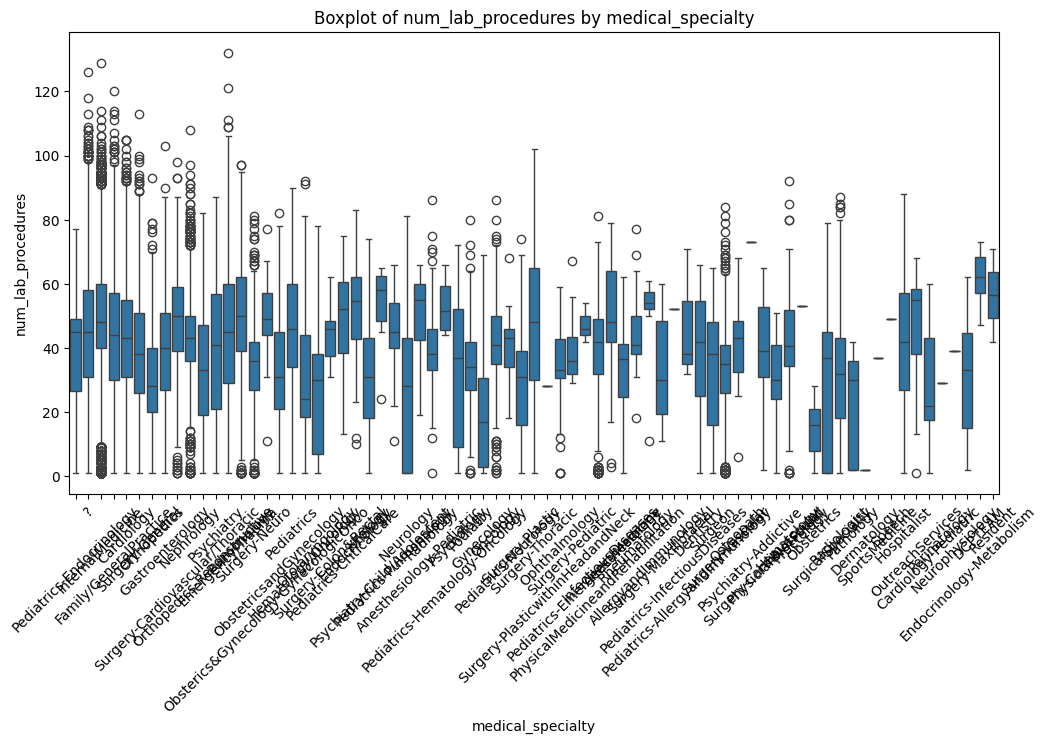

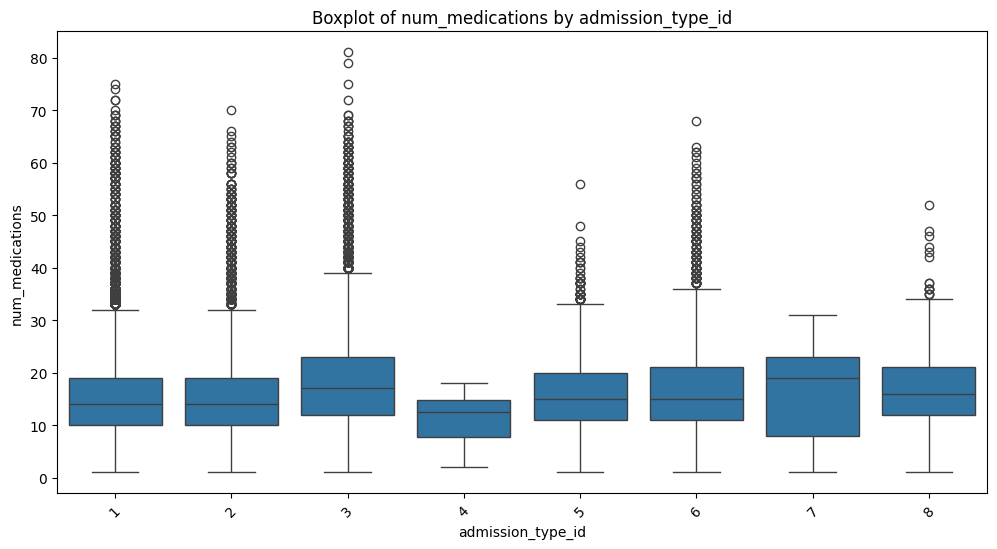

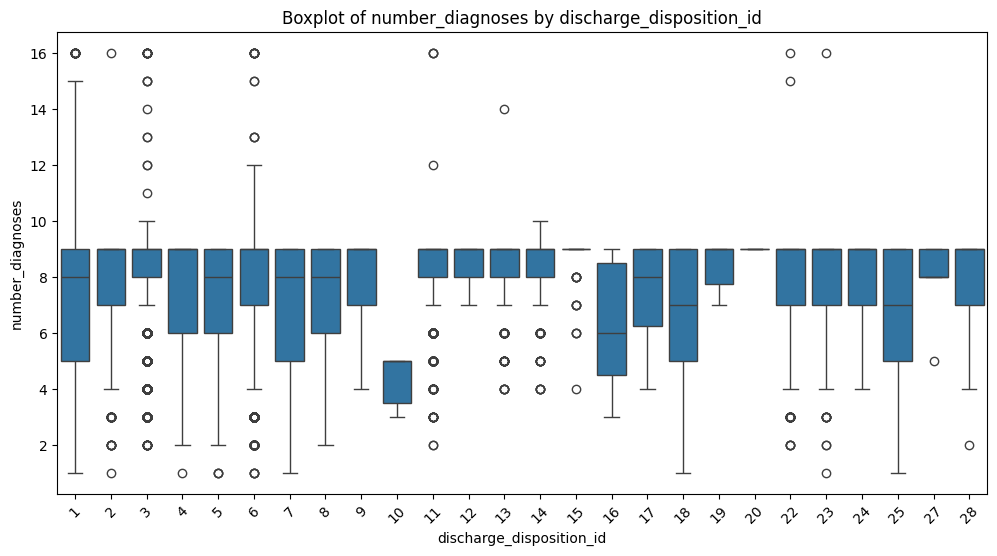

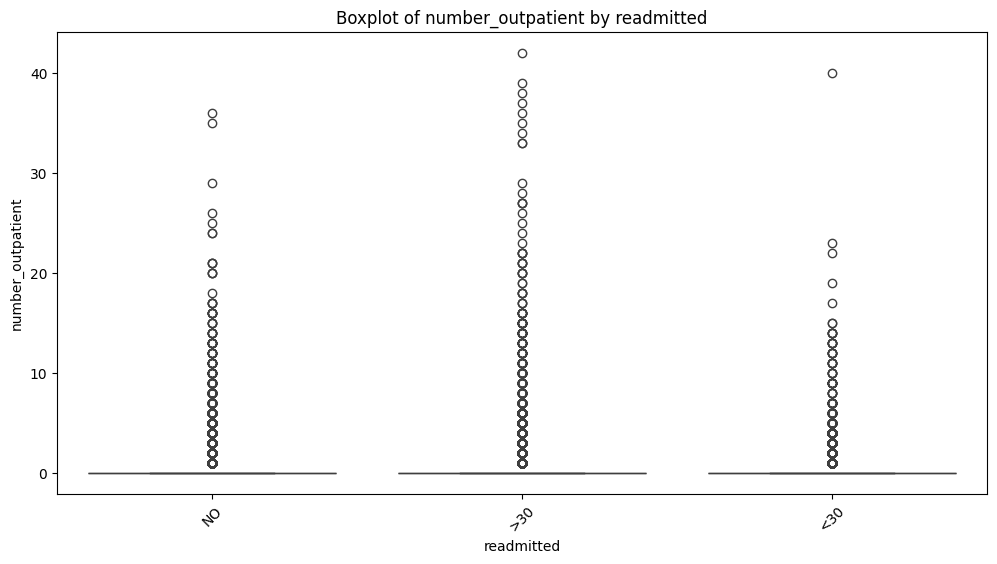

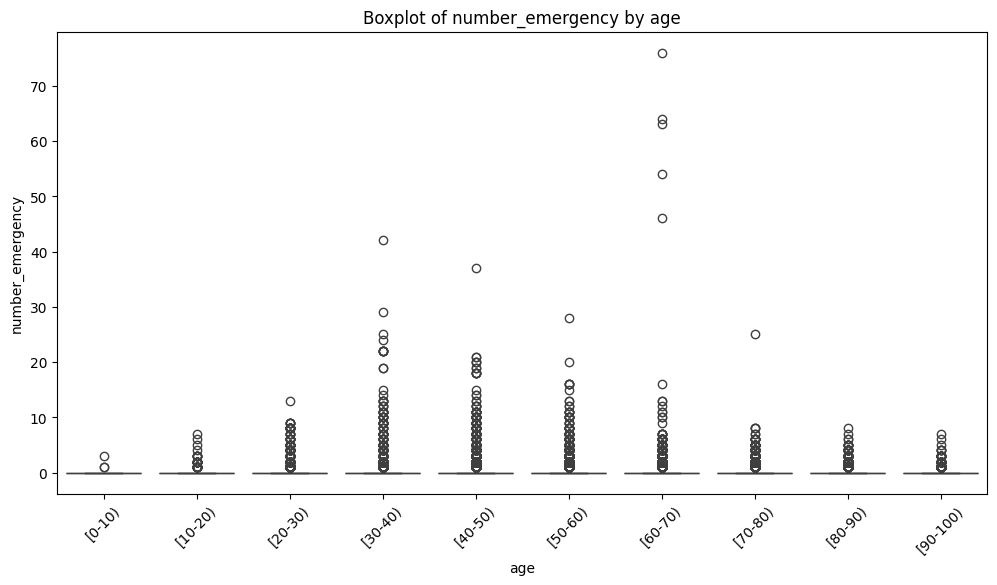

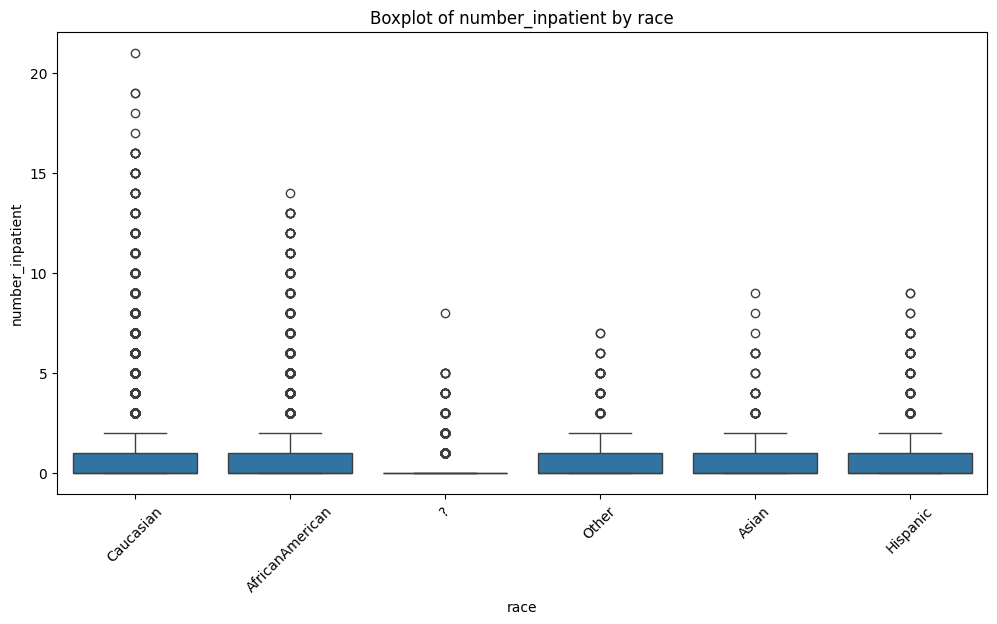

In [ ]:
for num_col, cat_col in boxplot_combinations:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=cat_col, y=num_col, data=diabetic_df)
    plt.title(f'Boxplot of {num_col} by {cat_col}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
barplot_combinations = [
    ('time_in_hospital', 'readmitted'),
    ('num_lab_procedures', 'medical_specialty'),
    ('num_medications', 'admission_source_id'),
    ('number_diagnoses', 'discharge_disposition_id'),
    ('number_outpatient', 'gender'),
    ('number_emergency', 'race'),
    ('number_inpatient', 'age')
]


<ipython-input-40-aaf7a399491f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y=num_col, data=diabetic_df, ci=None)


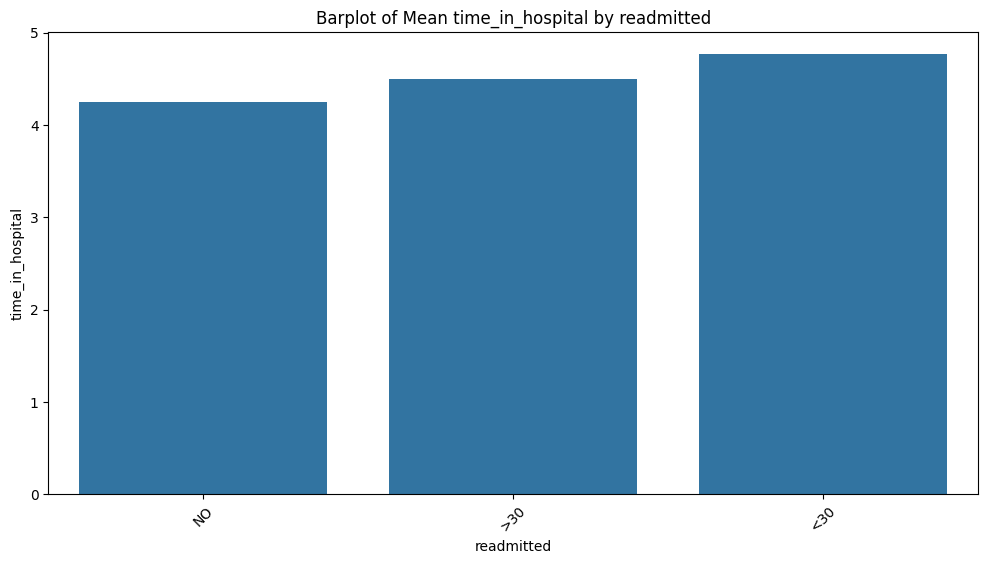

<ipython-input-40-aaf7a399491f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y=num_col, data=diabetic_df, ci=None)


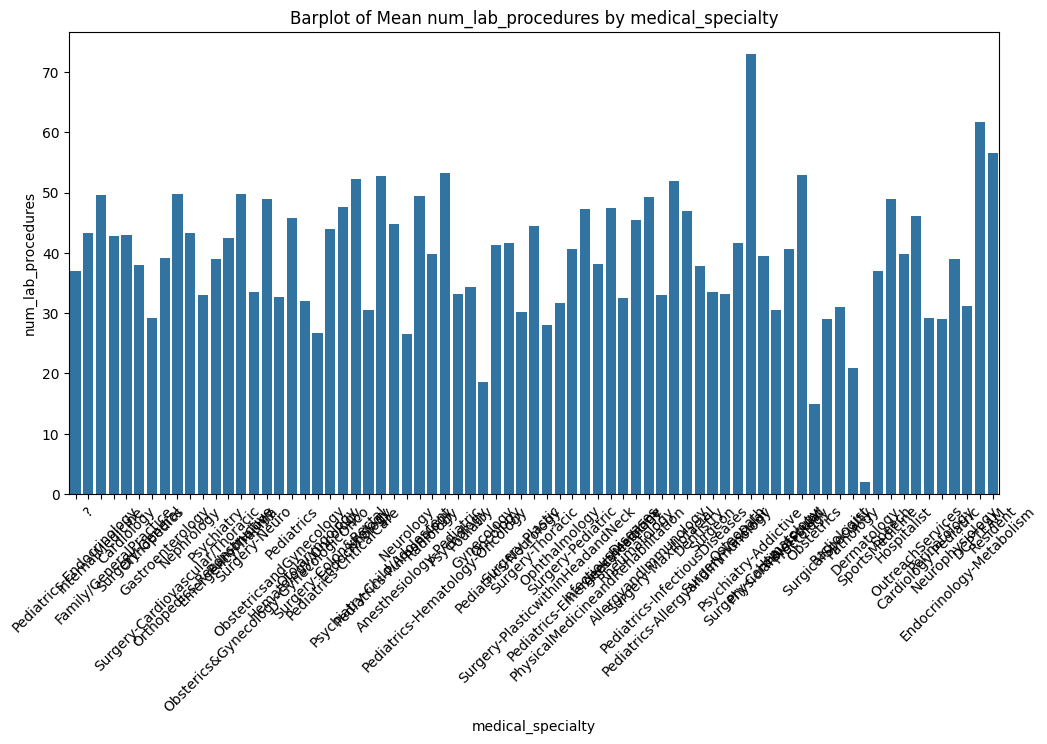

<ipython-input-40-aaf7a399491f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y=num_col, data=diabetic_df, ci=None)


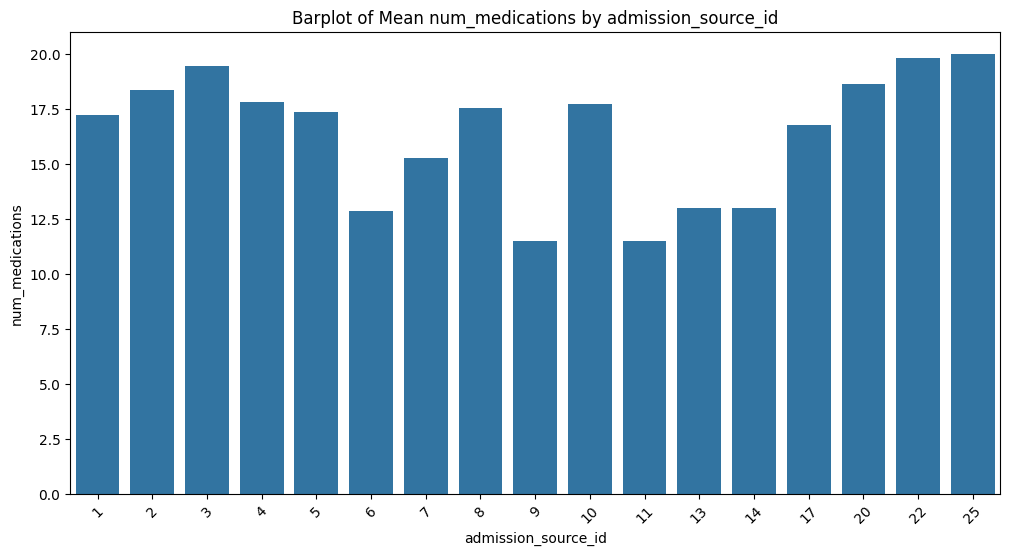

<ipython-input-40-aaf7a399491f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y=num_col, data=diabetic_df, ci=None)


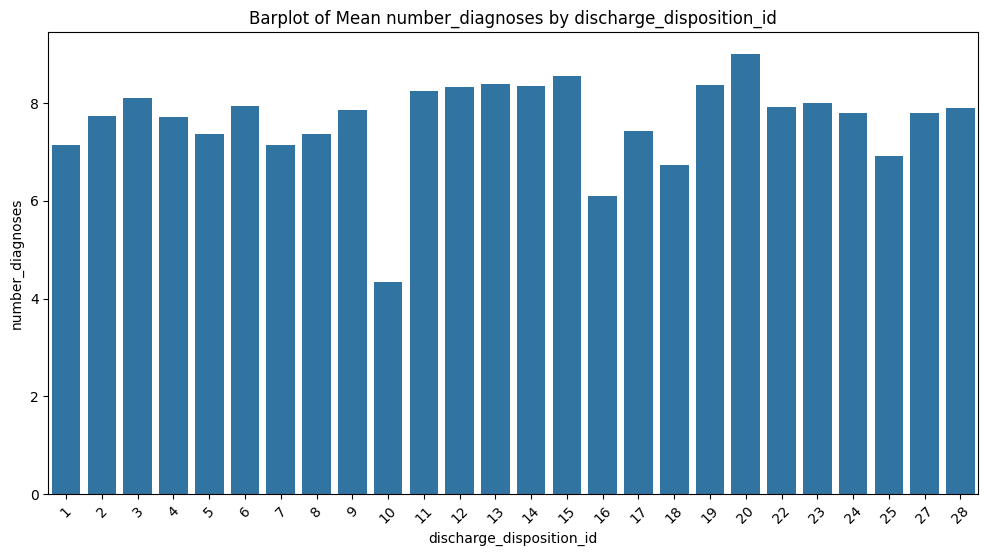

<ipython-input-40-aaf7a399491f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y=num_col, data=diabetic_df, ci=None)


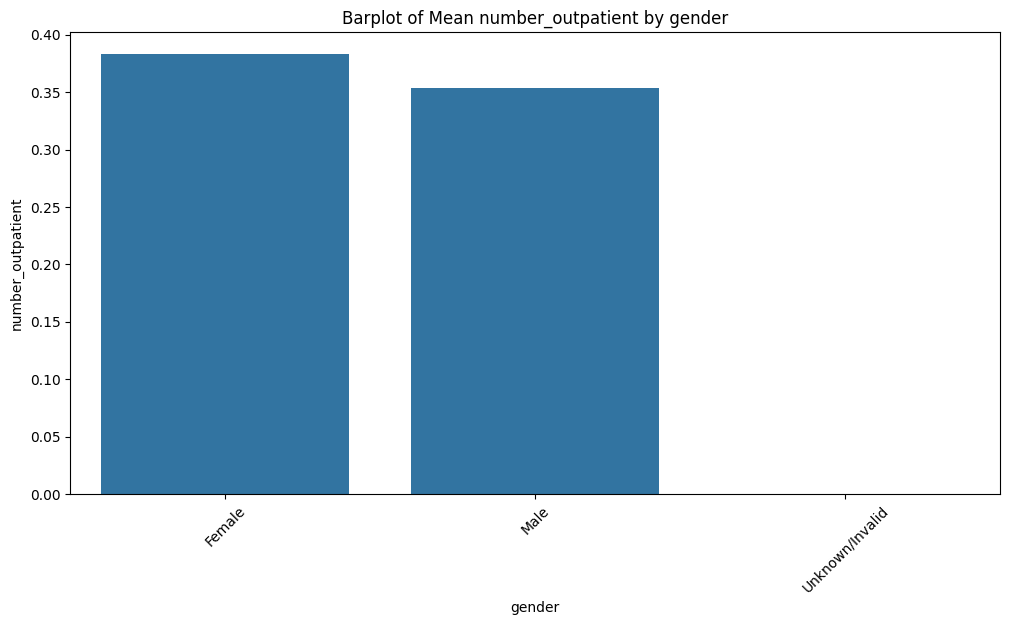

<ipython-input-40-aaf7a399491f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y=num_col, data=diabetic_df, ci=None)


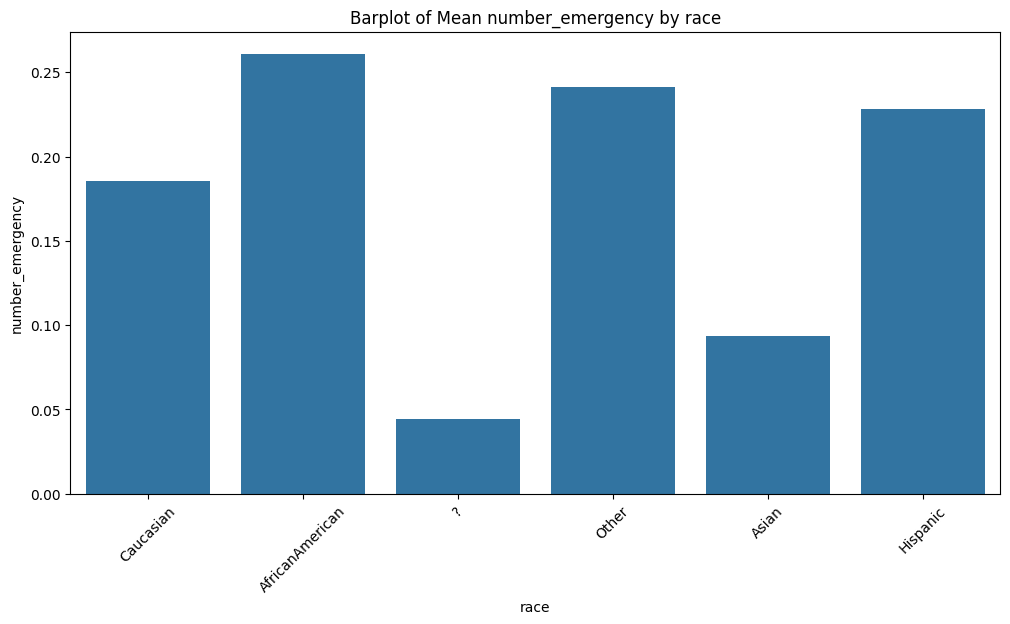

<ipython-input-40-aaf7a399491f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y=num_col, data=diabetic_df, ci=None)


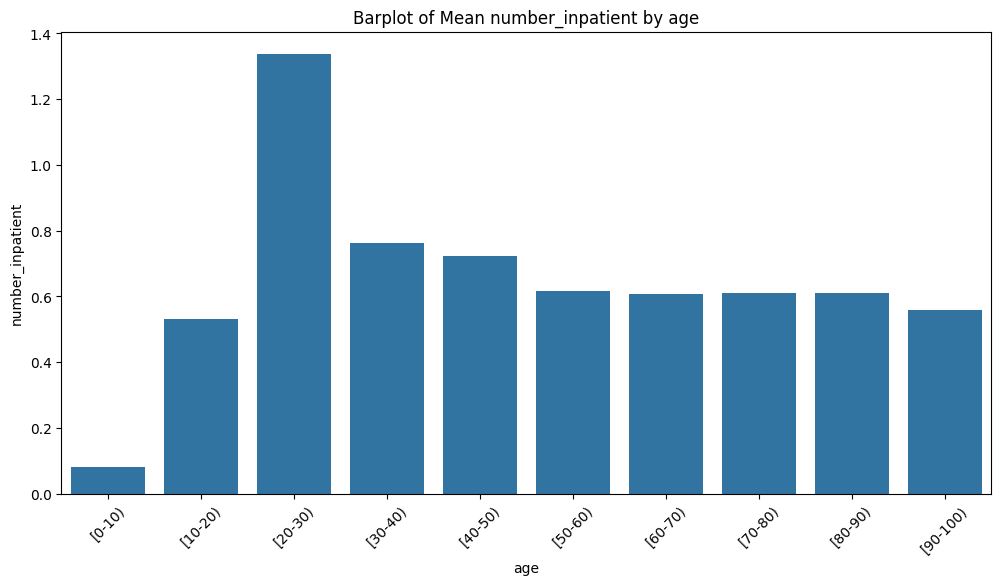

In [ ]:
for num_col, cat_col in barplot_combinations:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cat_col, y=num_col, data=diabetic_df, ci=None)
    plt.title(f'Barplot of Mean {num_col} by {cat_col}')
    plt.xticks(rotation=45)
    plt.show()

The `readmitted` attribute is the strongest candidate for prediction tasks

## Project Deliverable 3

In [ ]:
diabetic_df

encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital payer_code         medical_specialty  \
0                      1          ?  Pediatrics-Endocrinology   
1                      3          ?                         ?   
2                      2          ?                         ?   
3                      2          ?                         ?   
4                      1          ?                         ?   
...                  ...        ...                       ...   
101761                 3         MC                         ?   
101762                 5         MC                         ?   
101763                 1         MC                         ?   
101764                10         MC           Surgery-General   
101765                 6          ?                         ?   

        num_lab_procedures  num_procedures  num_medications  \
0                       41               0                1   
1                       59               0               18   
2                       11               5               13   
3                       44               1               16   
4                       51               0                8   
...                    ...             ...              ...   
101761                  51               0               16   
101762                  33               3               18   
101763                  53               0                9   
101764                  45               2               21   
101765                  13               3                3   

        number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  \
0                       0                 0                 0  250.83       ?   
1                       0                 0                 0     276  250.01   
2                       2                 0                 1     648     250   
3                       0                 0                 0       8  250.43   
4                       0                 0                 0     197     157   
...                   ...               ...               ...     ...     ...   
101761                  0                 0          